# 데이터 분석
- 데이터 분석은 머신러닝 솔루션을 만드는 과정에서 중요한 단계입니다.  
- 모델의 종류를 결정하고 훈련과정을 위해 선택될 피처의 집합에도 영향을 미칩니다.
- 모델이 추가 훈련될 필요가 있음을 나타낼 수 있는 시간에 따른 경향의 변화를 식별하는 데 도움이 됩니다.  
- 신용카드 데이터셋의 데이터를 탐색하고 분석하고, 정상과 비정상 거래를 구별하는 몇가지 피처를 식별하겠습니다.  
   
- 데이터셋 출처 : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud  
  개인정보를 제거하고 주성분 분석(PCA) 처리가 된 데이터입니다.

- 도서 : [MLFlow를 활용한 MLOps](https://www.yes24.com/Product/Goods/106709982)

### 라이브러리 설치

%pip install -q numpy pandas matplotlib

### 라이브러리 버전 확인

In [2]:
%pip show pandas

Name: pandasNote: you may need to restart the kernel to use updated packages.

Version: 2.2.0
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of

### 라이브러리 임포트

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8

### CSV 파일을 읽고 이를 데이터프레임으로 변환하고 데이터를 확인합니다. 

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.shape

(284807, 31)

### 정상거래  데이터셋과 부정거래 데이터셋 생성 

In [8]:
anomalies = df[df.Class == 1]
normal = df[df.Class == 0]

In [9]:
print(f"Anomalies: {anomalies.shape}")
print(f"Normal: {normal.shape}")

Anomalies: (492, 31)
Normal: (284315, 31)


Text(0, 0.5, 'Counts')

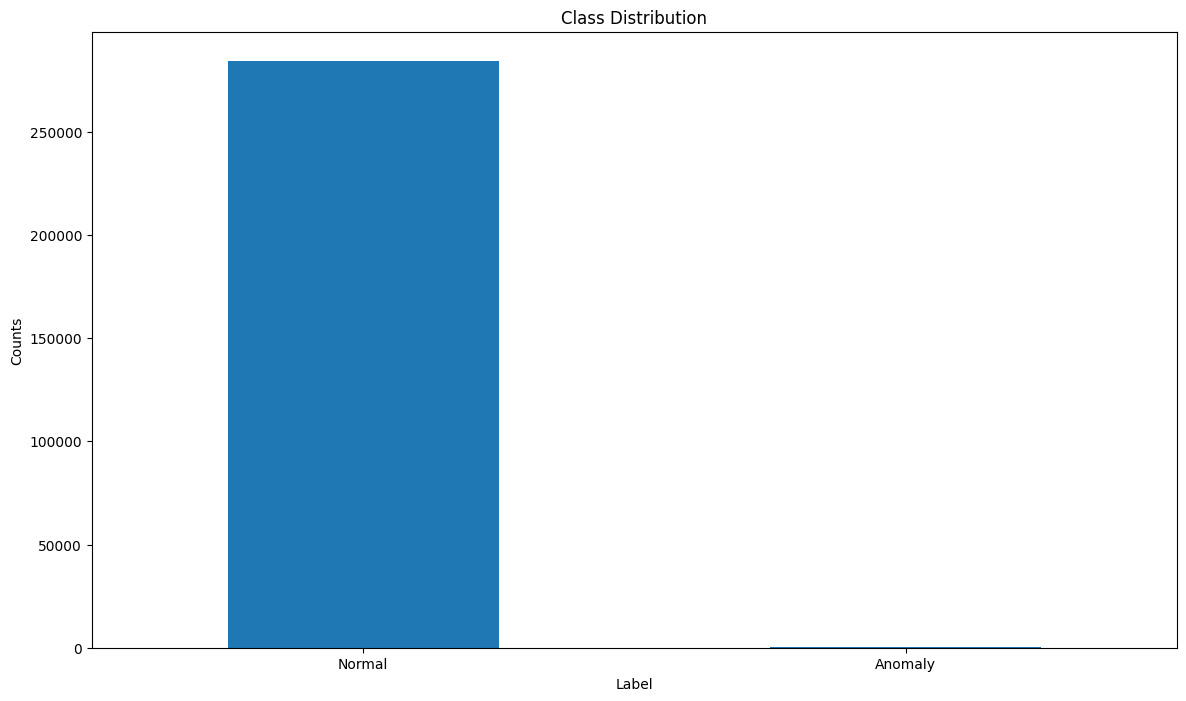

In [10]:
class_counts = pd.value_counts(df['Class'], sort = True)
class_counts.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), ["Normal", "Anomaly"]) 
plt.xlabel("Label")
plt.ylabel("Counts")

In [11]:
anomalies.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### 대부분의 트랜잭션이 100달러 미만으로 부정거래가 고액 트랜잭션이 아닌 것을 알 수 있습니다.

In [13]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

시각화 분석을 위한 함수를 정의합니다.

In [19]:
def plot_histogram(df, bins, column, log_scale=False):
	anomalies = df[df.Class == 1]
	normal = df[df.Class == 0]
	fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
	fig.suptitle(f'Counts of {column} by Class')
	ax1.hist(anomalies[column], bins = bins, color="red")
	ax1.set_title('Anomaly')
	ax2.hist(normal[column], bins = bins, color="orange")
	ax2.set_title('Normal')
	plt.xlabel(f'{column}') 
	plt.ylabel('Count')
	if log_scale:
		plt.yscale('log')
	plt.xlim((np.min(df[column]), np.max(df[column])))
	plt.show()

In [15]:
def plot_scatter(df, x_col, y_col, sharey = False):
	anomalies = df[df.Class == 1]
	normal = df[df.Class == 0]
	fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=sharey)
	fig.suptitle(f'{y_col} over {x_col} by Class')
	ax1.scatter(anomalies[x_col], anomalies[y_col], color='red') 
	ax1.set_title('Anomaly')
	ax2.scatter(normal[x_col], normal[y_col], color='orange')
	ax2.set_title('Normal')
	plt.xlabel(x_col)
	plt.ylabel(y_col)
	plt.show()

### 클래스별 Transaction Amount 표시

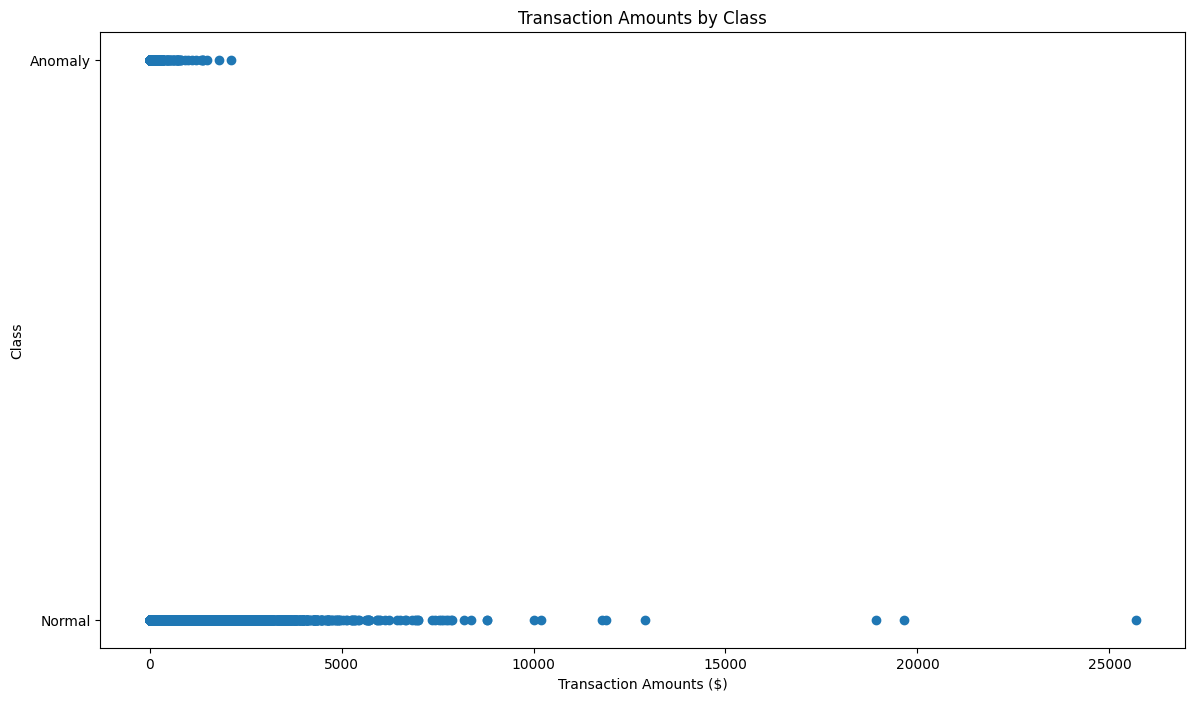

In [16]:
plt.scatter(df.Amount, df.Class)
plt.title("Transaction Amounts by Class")
plt.ylabel("Class")
plt.yticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Transaction Amounts ($)")
plt.show()

### Amout 값을 100개 구간으로 구성한 데이터 값의 히스토그램
- 정상 데이터에 존재하는 대규모 아웃라이어와 오른쪽 치우침을 확인할 수 있습니다.   

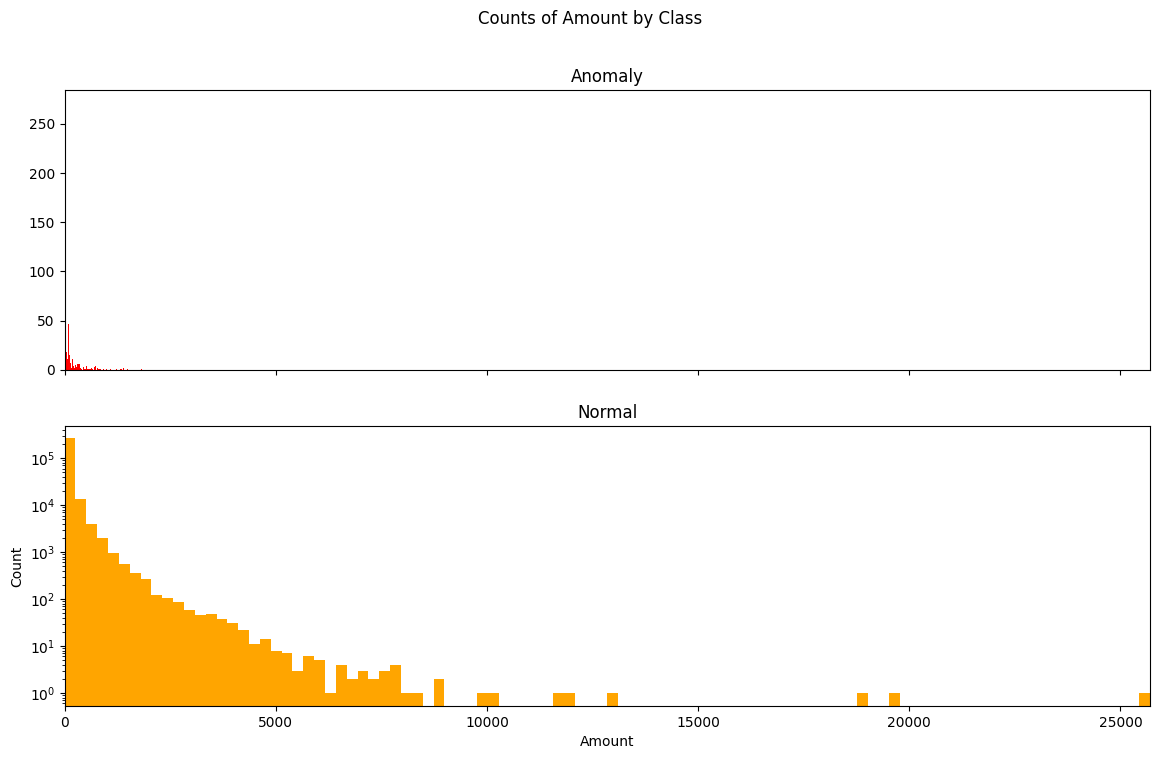

In [20]:
bins = 100
plot_histogram(df, bins, "Amount", log_scale=True)

- 비정상 데이터의 히스토그램으로 더 큰 오른쪽 치우침을 볼 수 있고, 이상거래의 금액(Amount)이 상당히 작은것을 알 수 있습니다. 

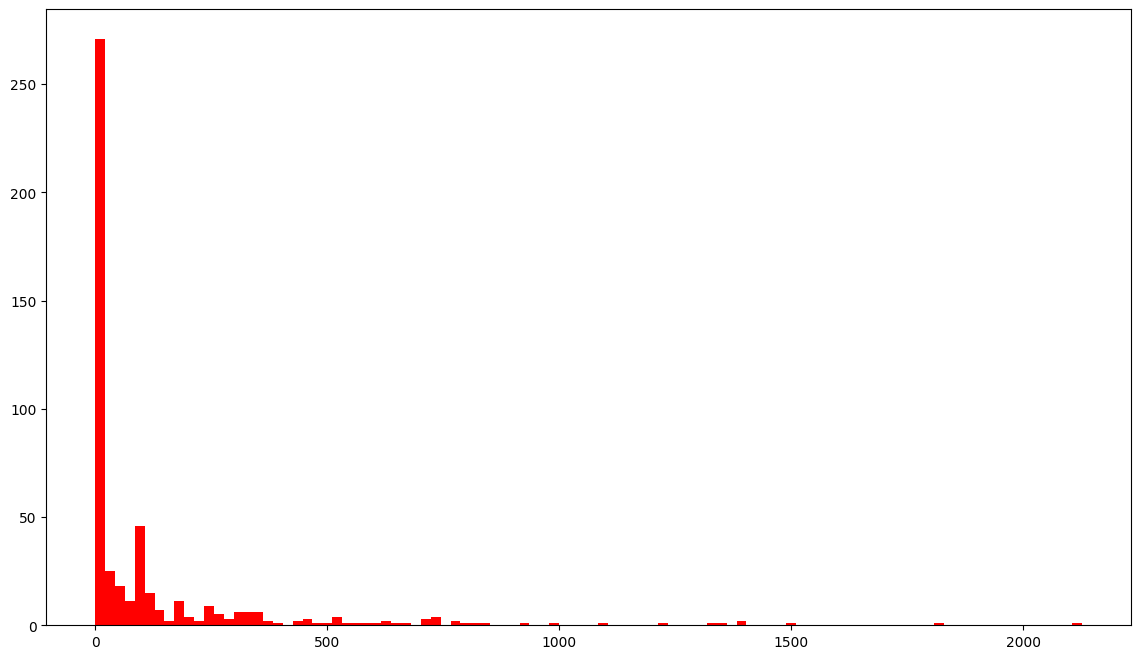

In [21]:
plt.hist(anomalies.Amount, bins=100, color="red")
plt.show()

### Time 컬럼에 대한 기본 산점도 표시
- 부정 거래가 전체 타임라인에 걸쳐 상당히 퍼져 있는 것을 알 수 있습니다.

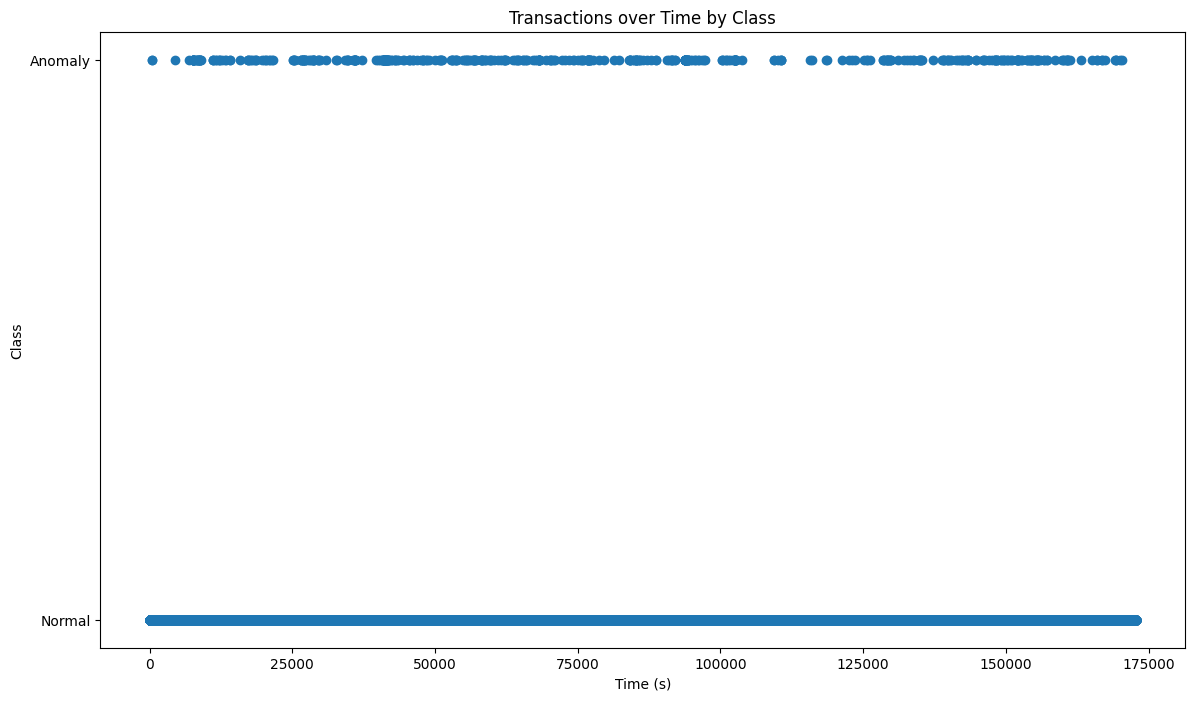

In [22]:
plt.scatter(df.Time, df.Class)
plt.title("Transactions over Time by Class")
plt.ylabel("Class")
plt.yticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Time (s)")
plt.show()

plot_scatter() 함수를 사용해 데이터 값을 표시합니다.

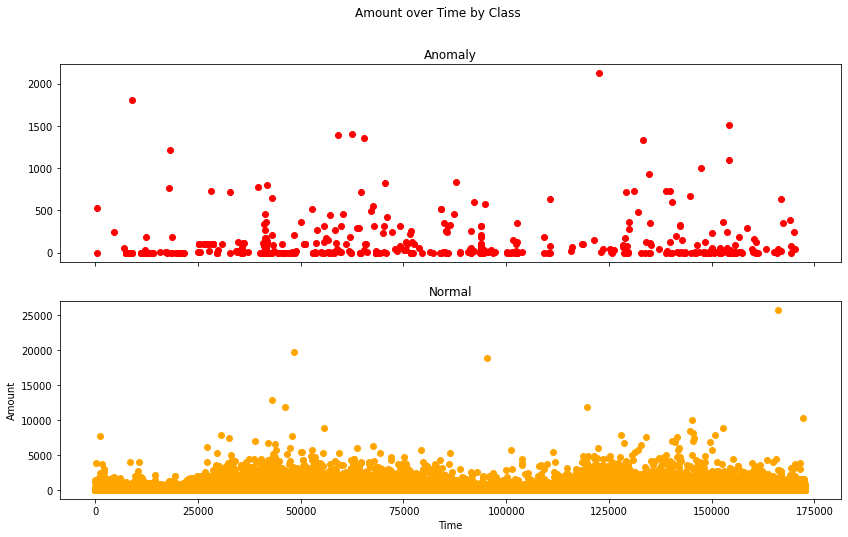

In [29]:
plot_scatter(df, "Time", "Amount")

V1값에 대한 히스토그램

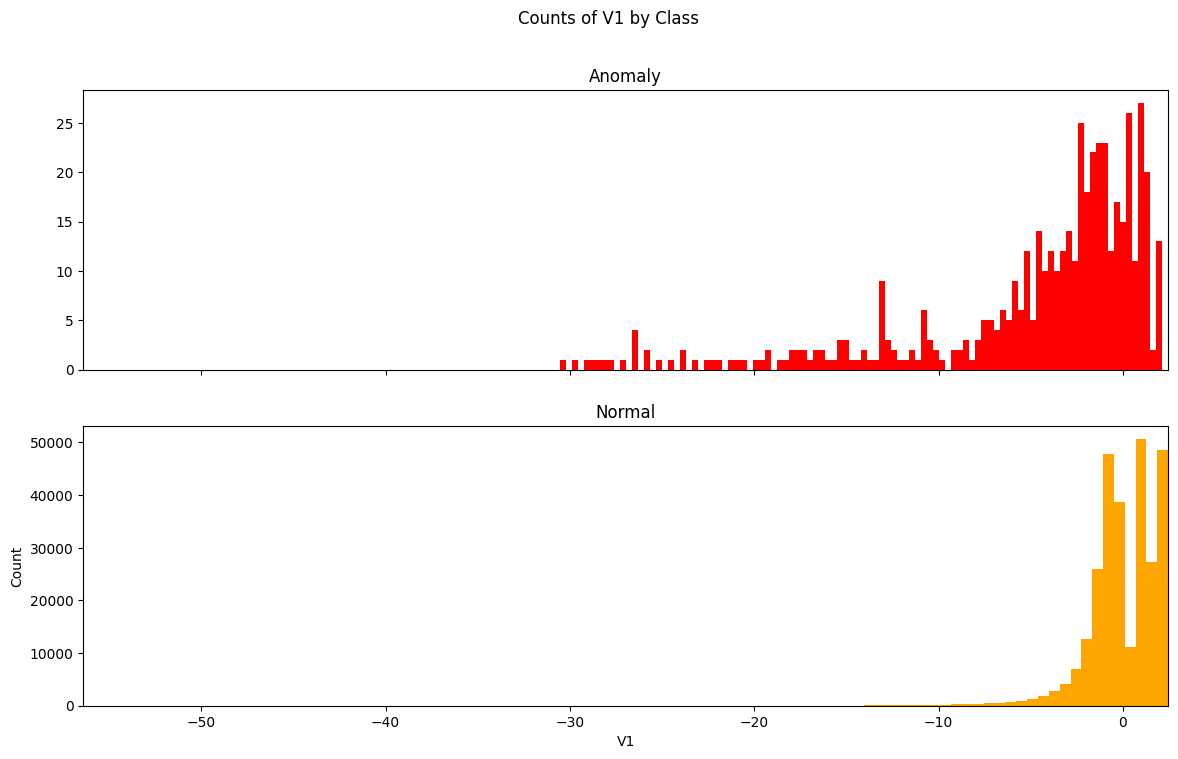

In [23]:
plot_histogram(df, 100, "V1")

동일한 V1 값에 대한 각 클래스의 점 분포에서 분명한 차이을 확인할 수 있습니다.  
부정 거래가 포함되는 값의 범위는 V1의 값으로 확장됩니다.

sharey=True 로 설정하여 두 개의 플롯이 동일한 Y축을 사용하도록 합니다.

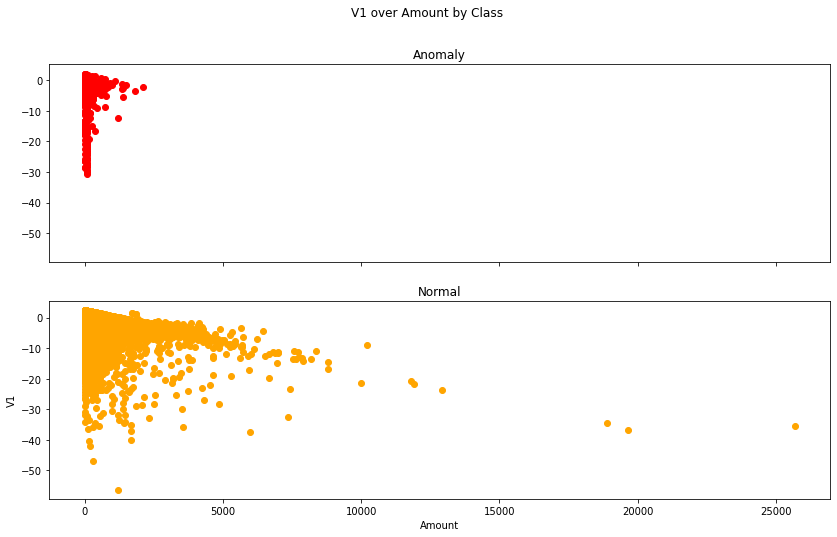

In [32]:
plot_scatter(df, "Amount", "V1", sharey=True)

이 그래프에서 이상점은 다른 모든 정상 포인트와 비교했을 때 적절하지 않은것으로 보입니다.   
Time과 V1의 값이 어떻게 관련되어 있는지 살펴 보겠습니다.

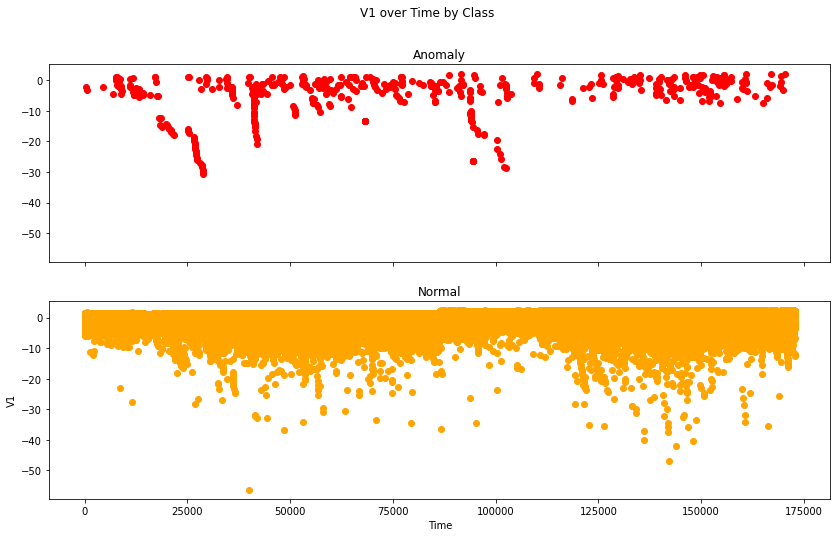

In [33]:
plot_scatter(df, "Time", "V1", sharey=True)

### 각 칼럼에 대한 히스토그램을 표시

V1 Counts


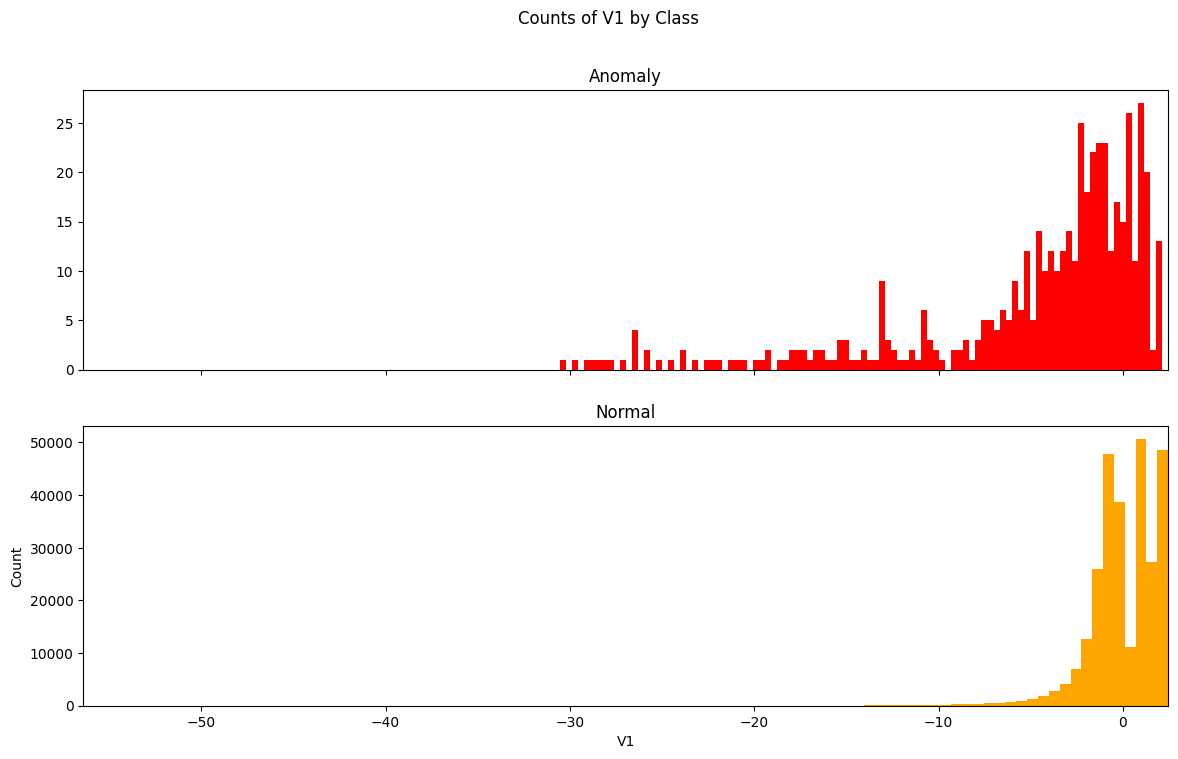

V2 Counts


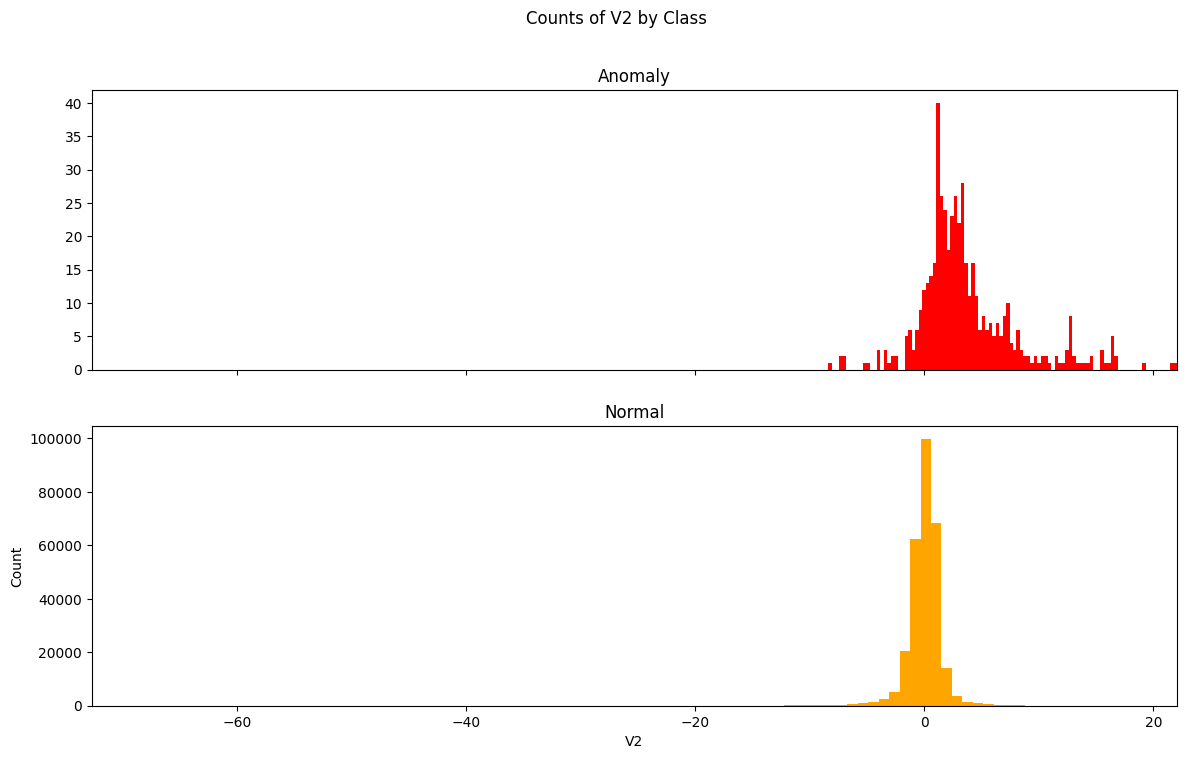

V3 Counts


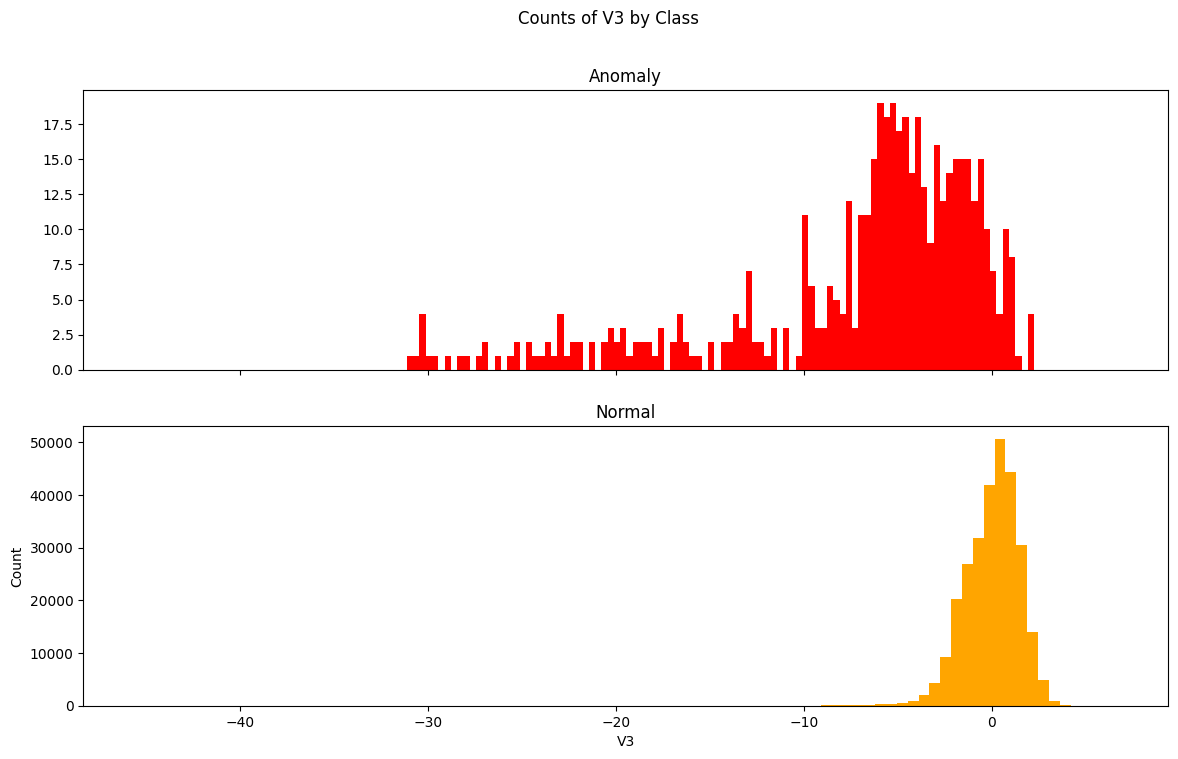

V4 Counts


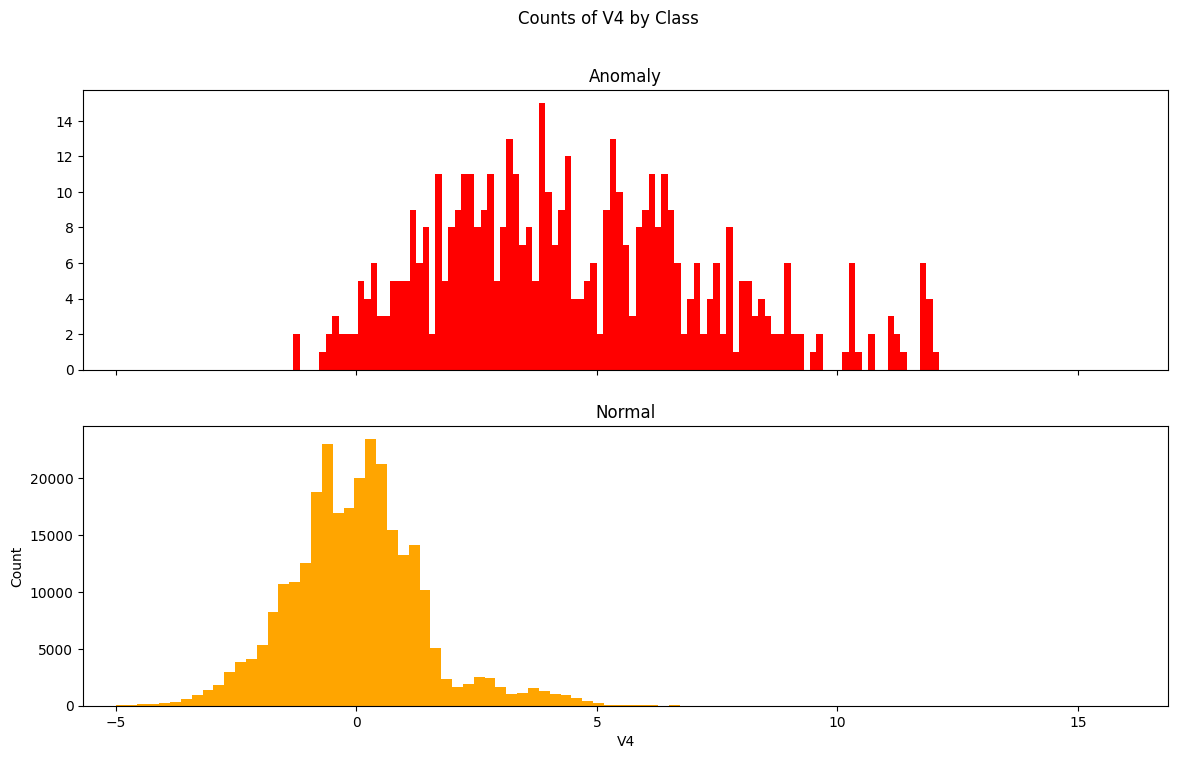

V5 Counts


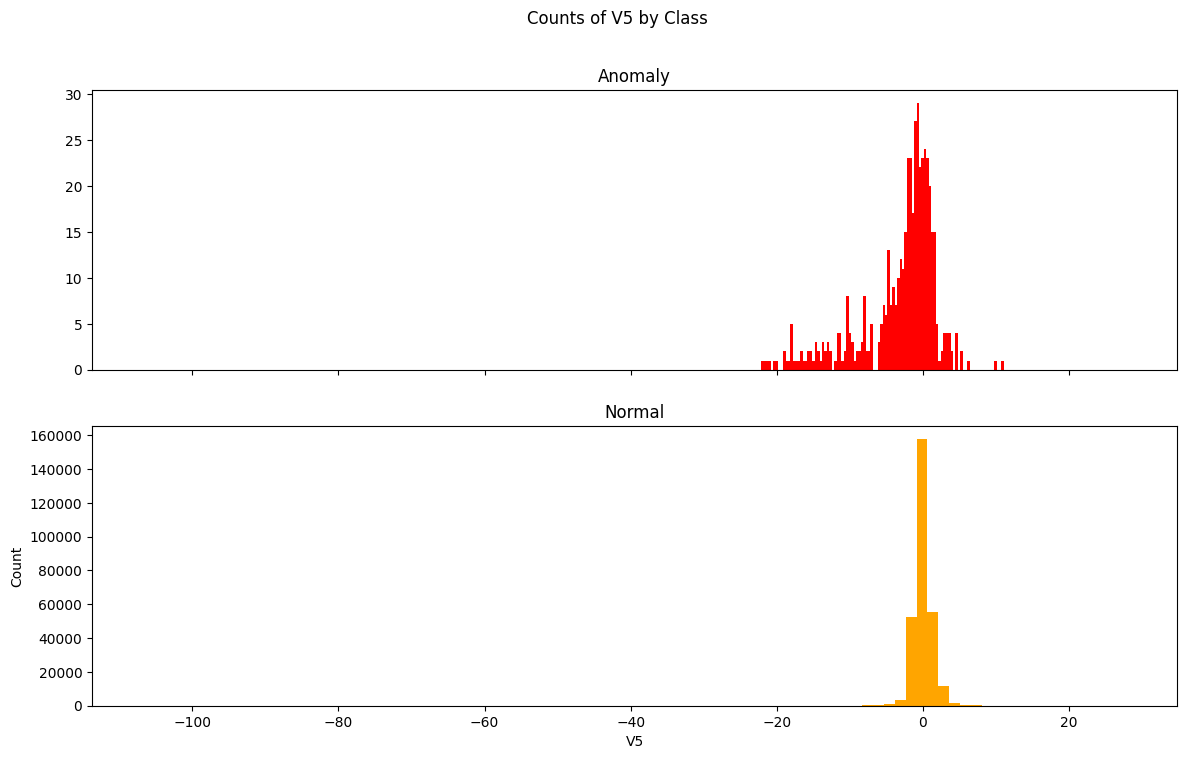

V6 Counts


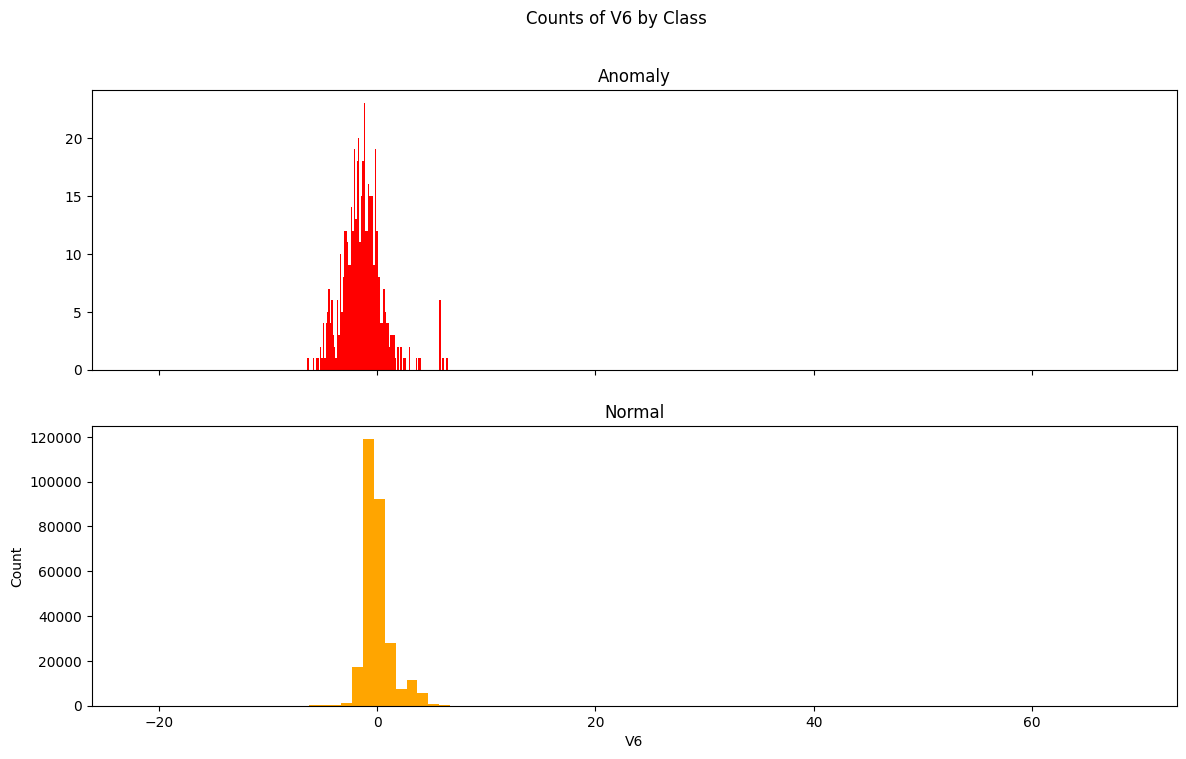

V7 Counts


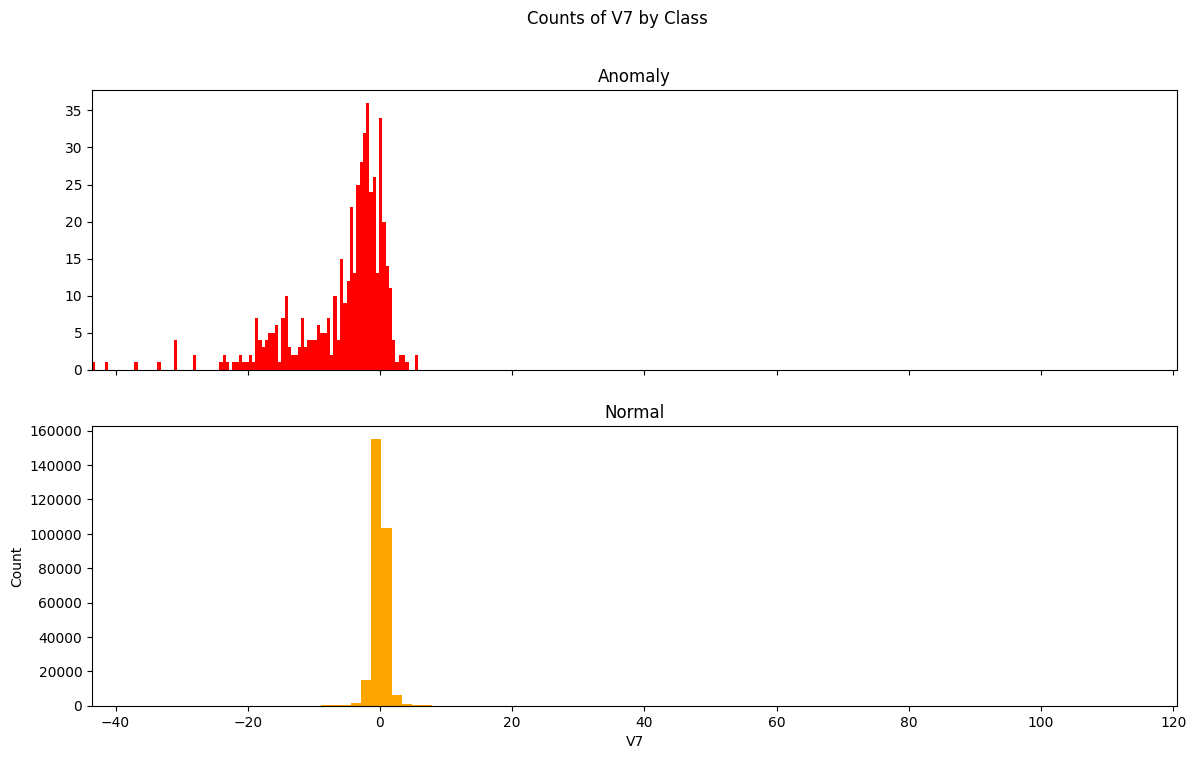

V8 Counts


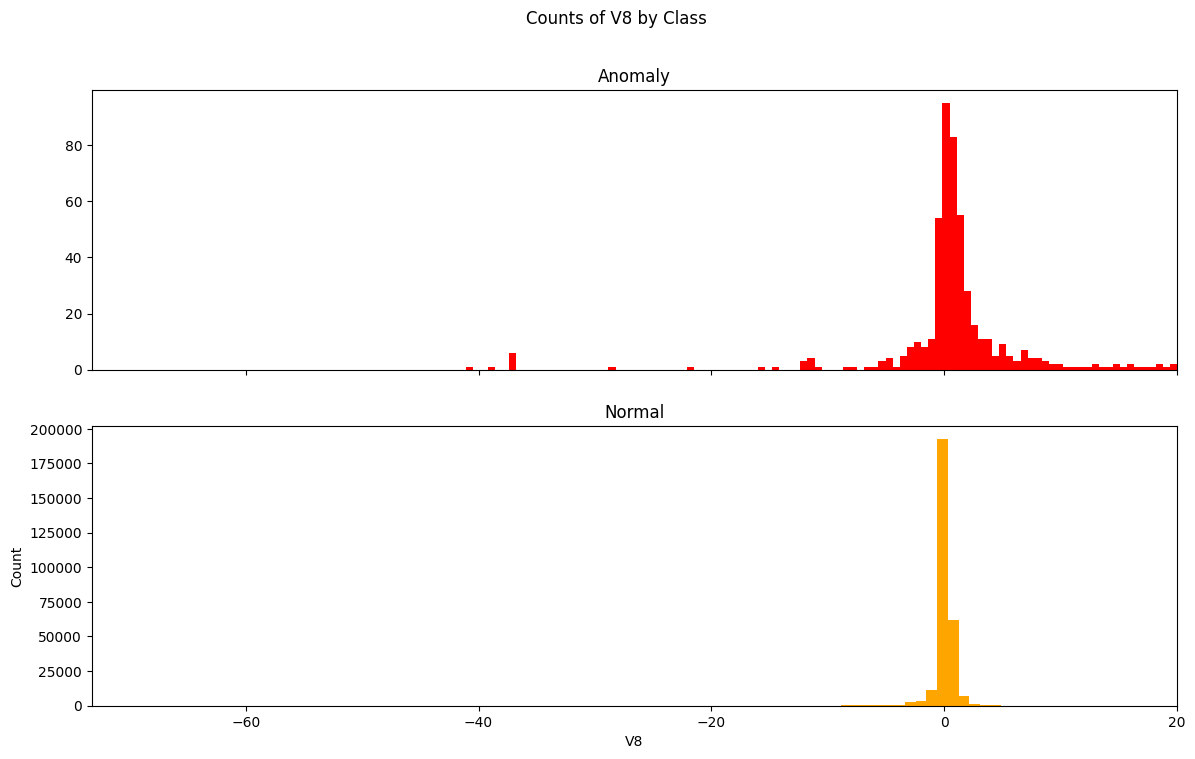

V9 Counts


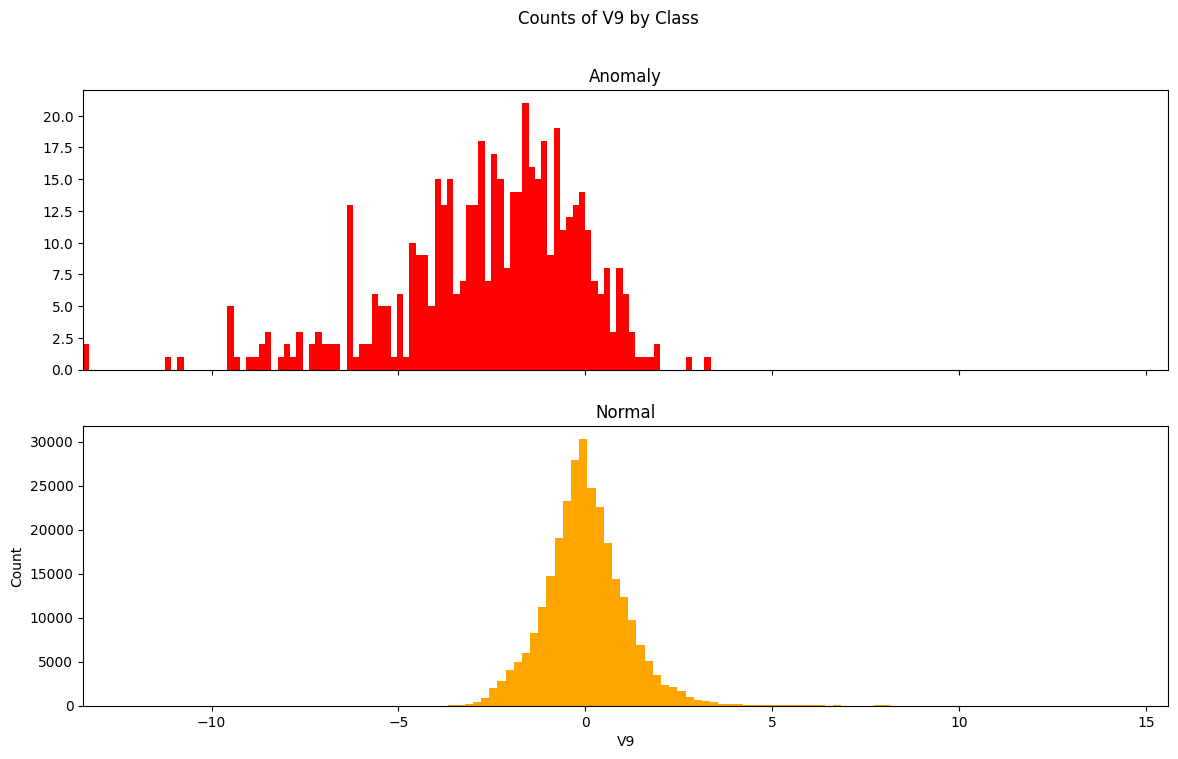

V10 Counts


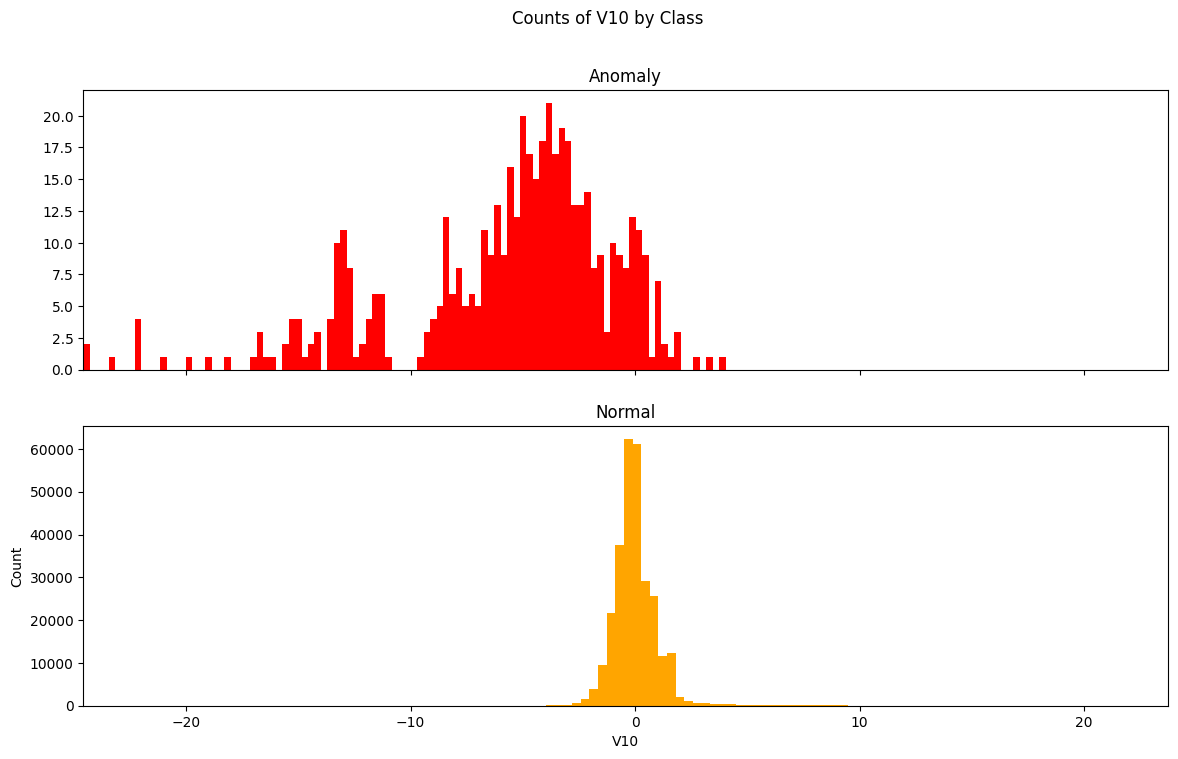

V11 Counts


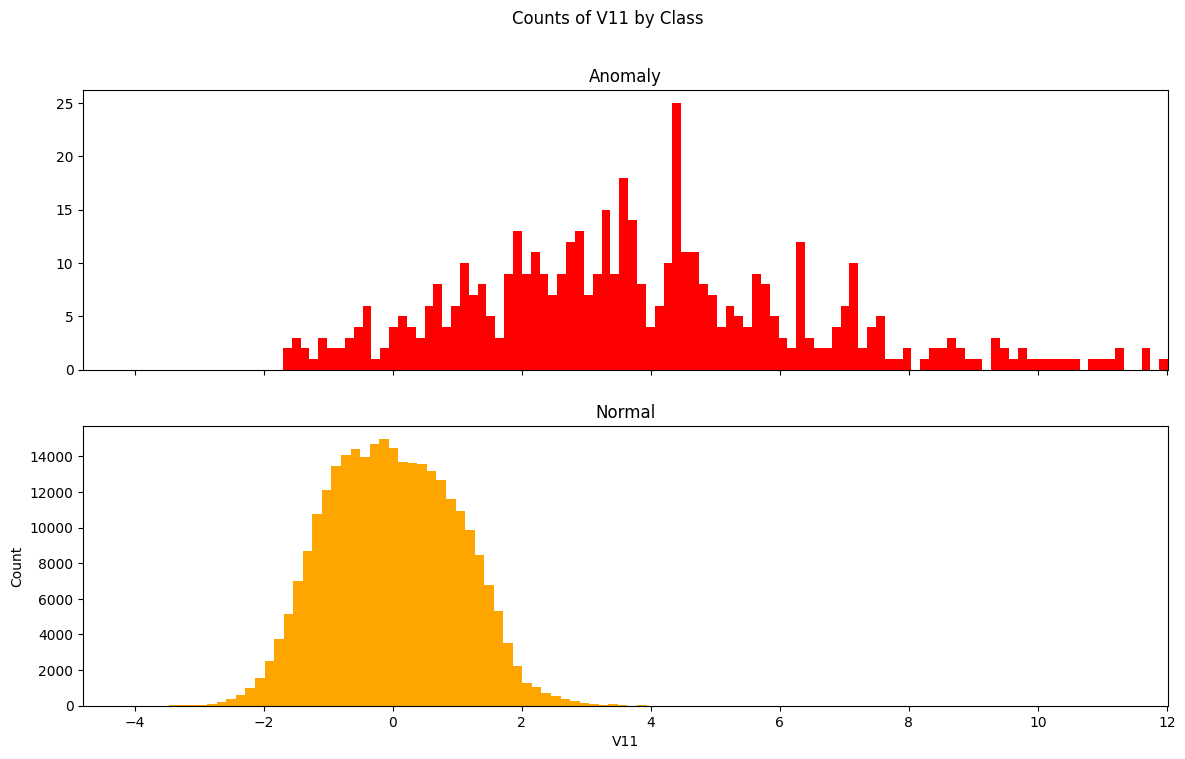

V12 Counts


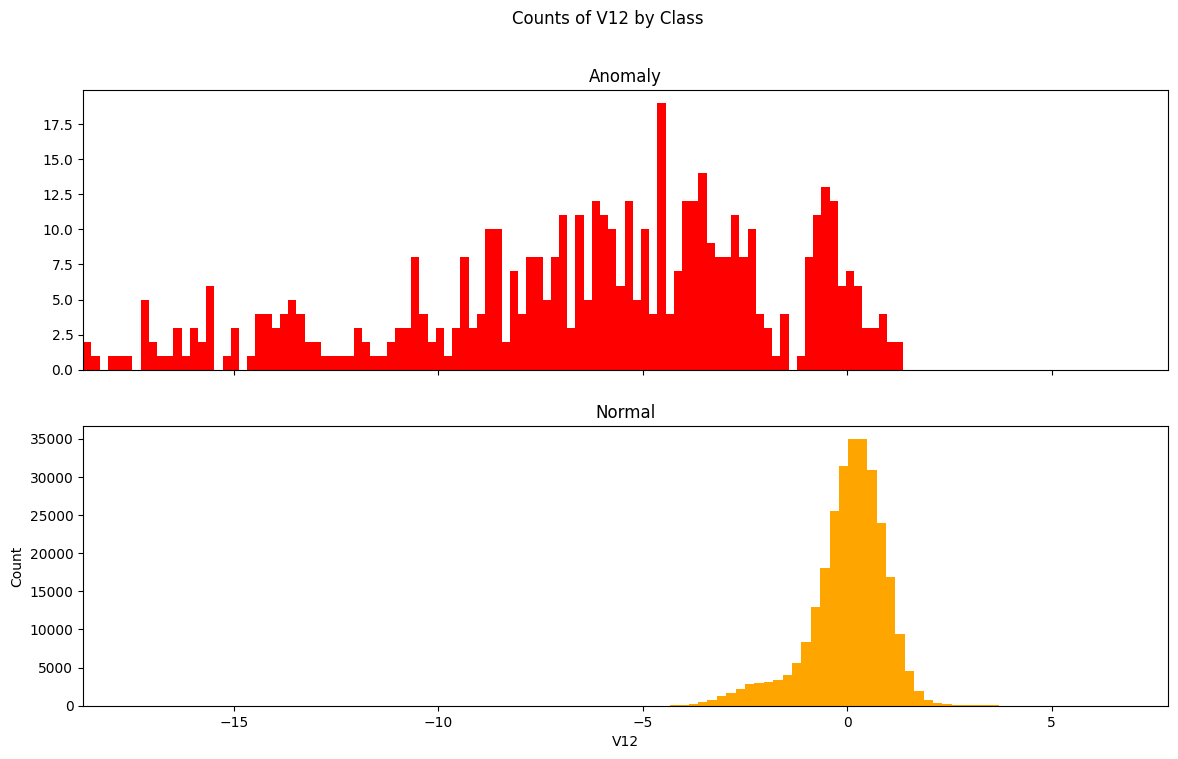

V13 Counts


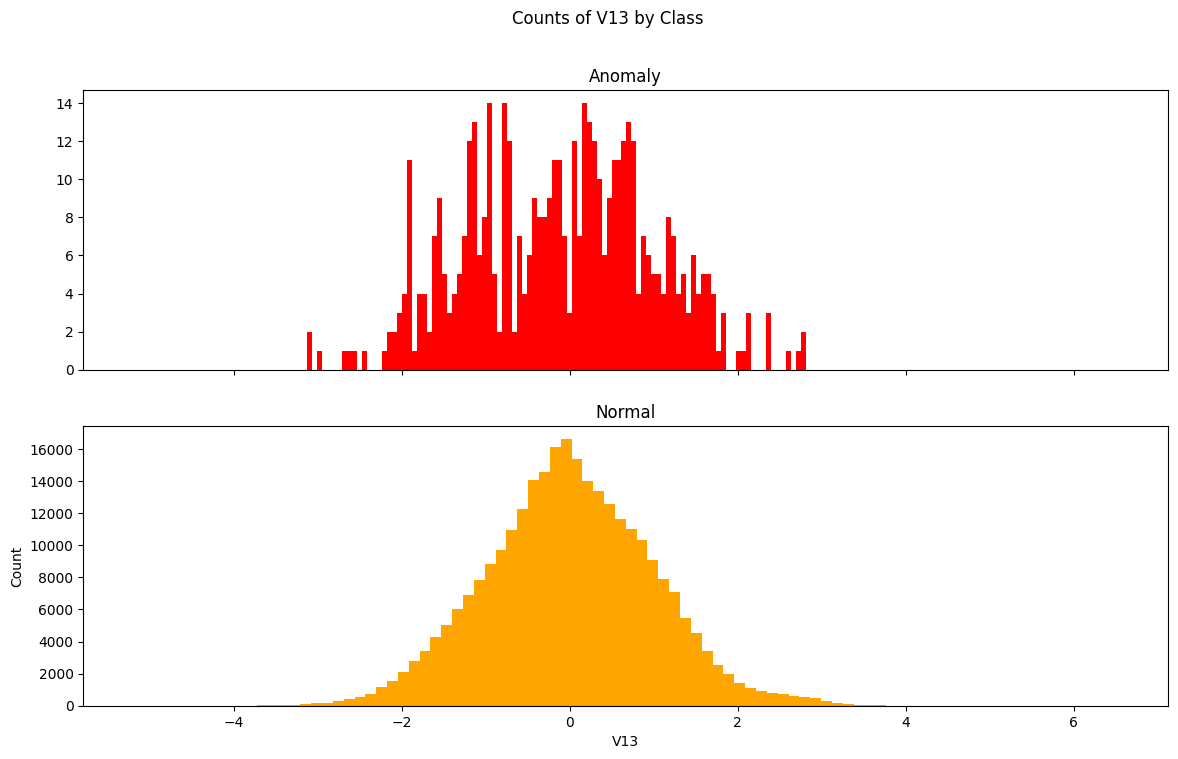

V14 Counts


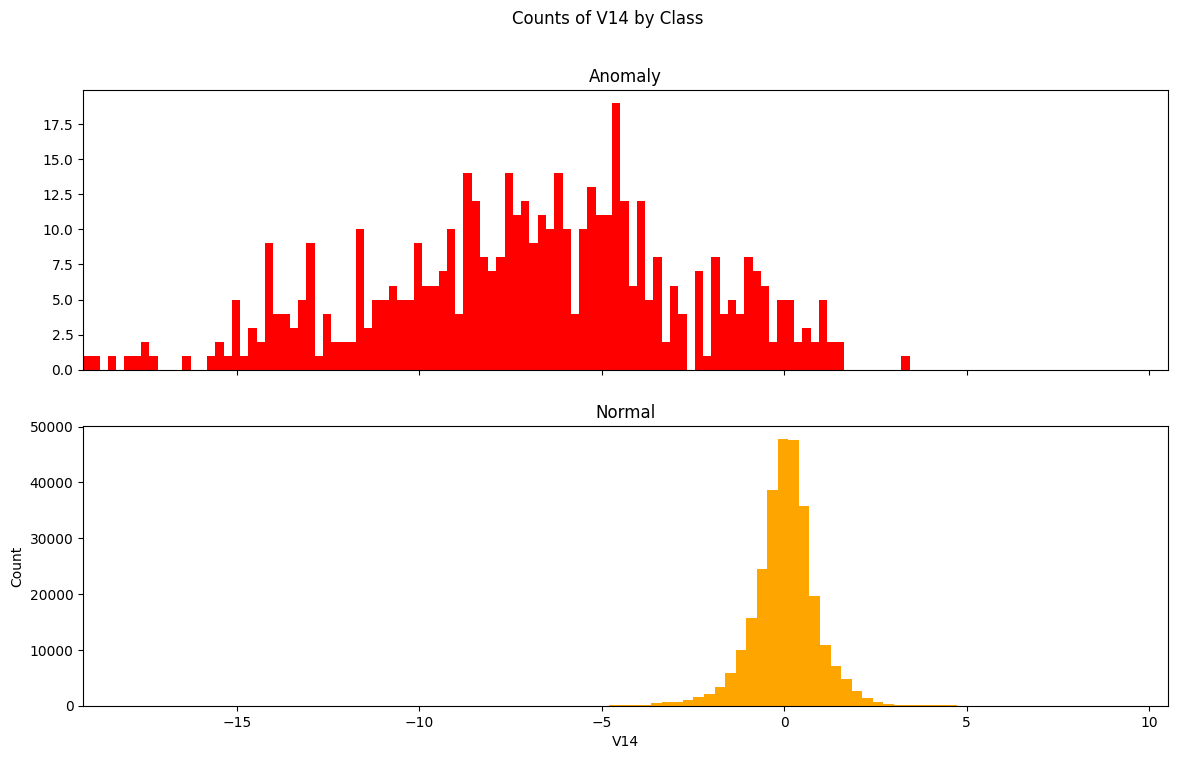

V15 Counts


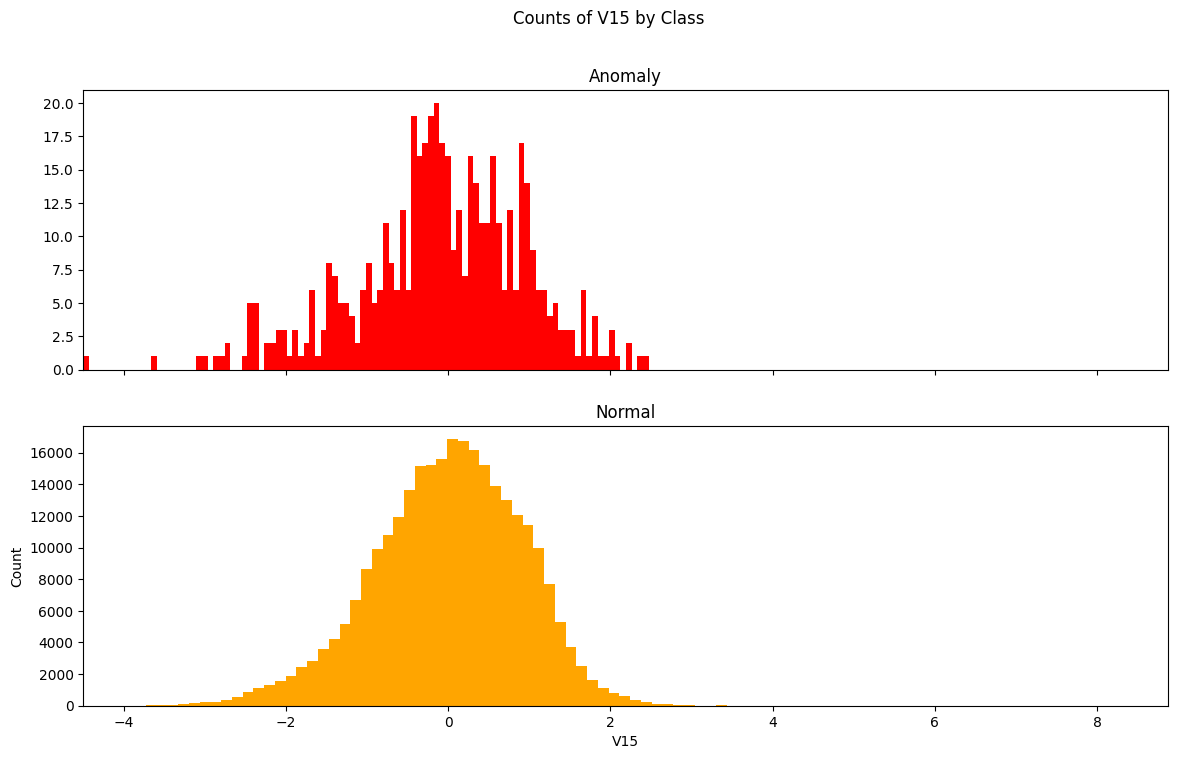

V16 Counts


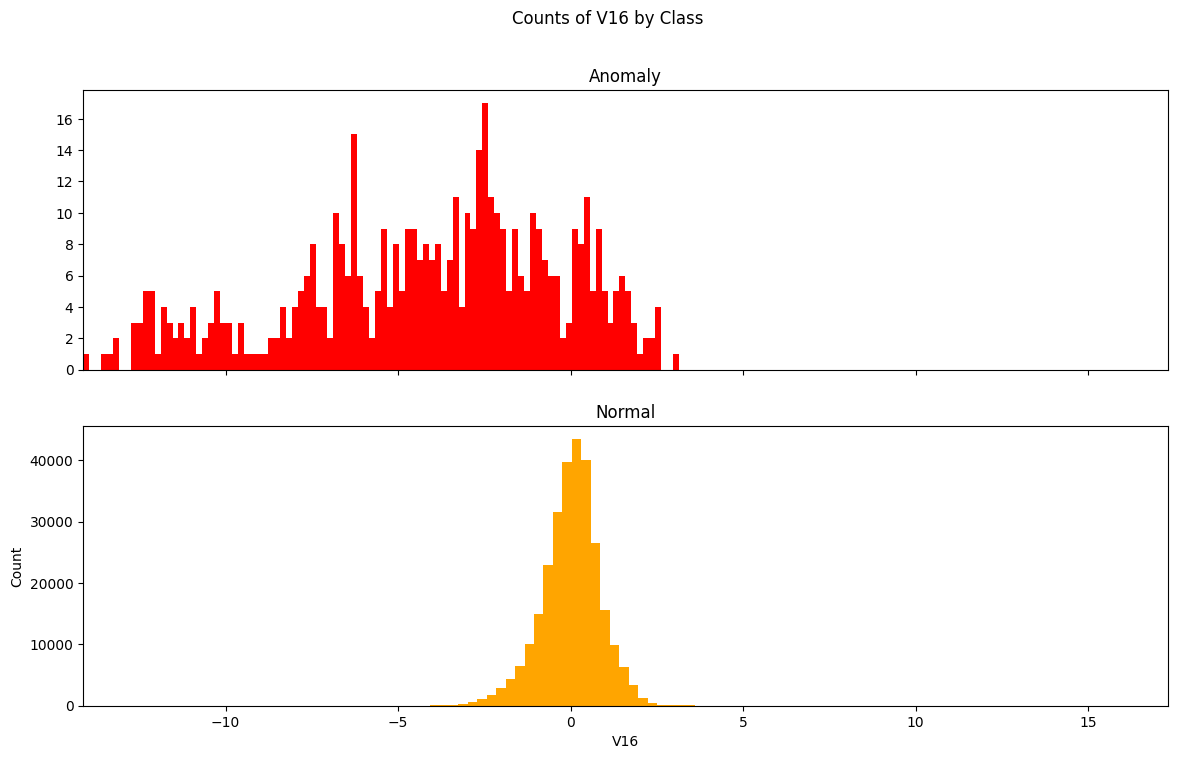

V17 Counts


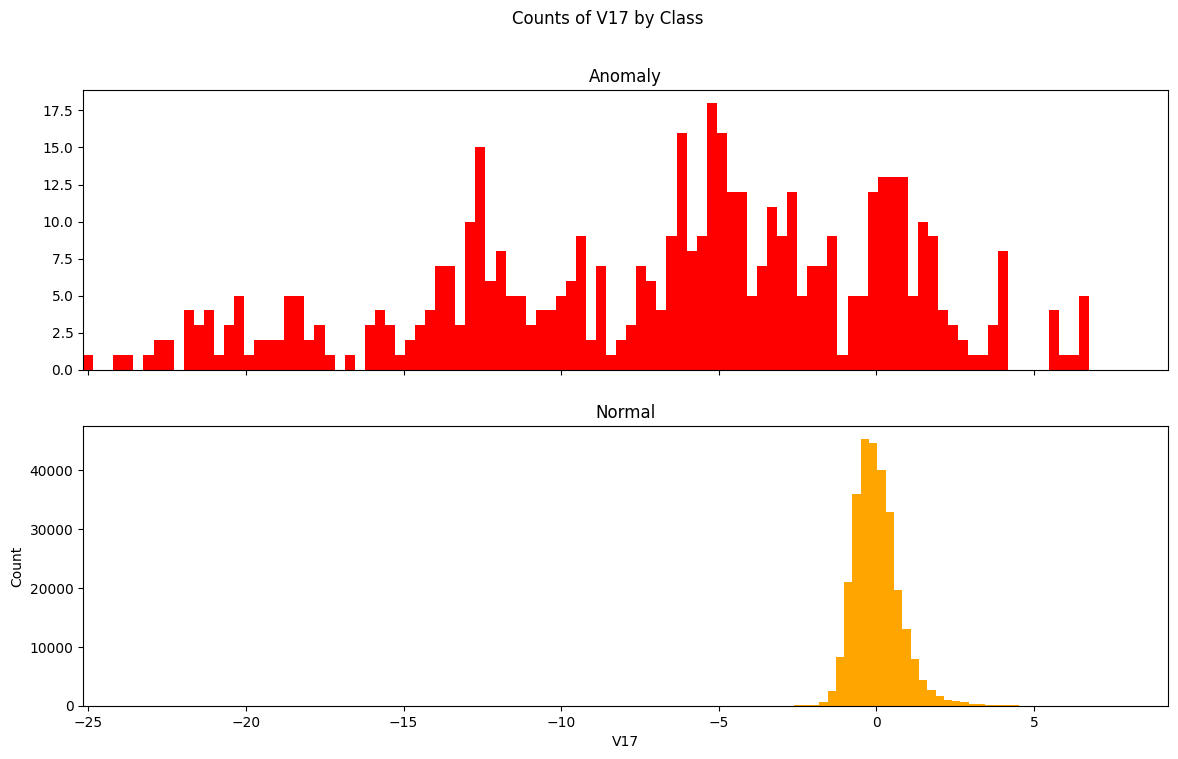

V18 Counts


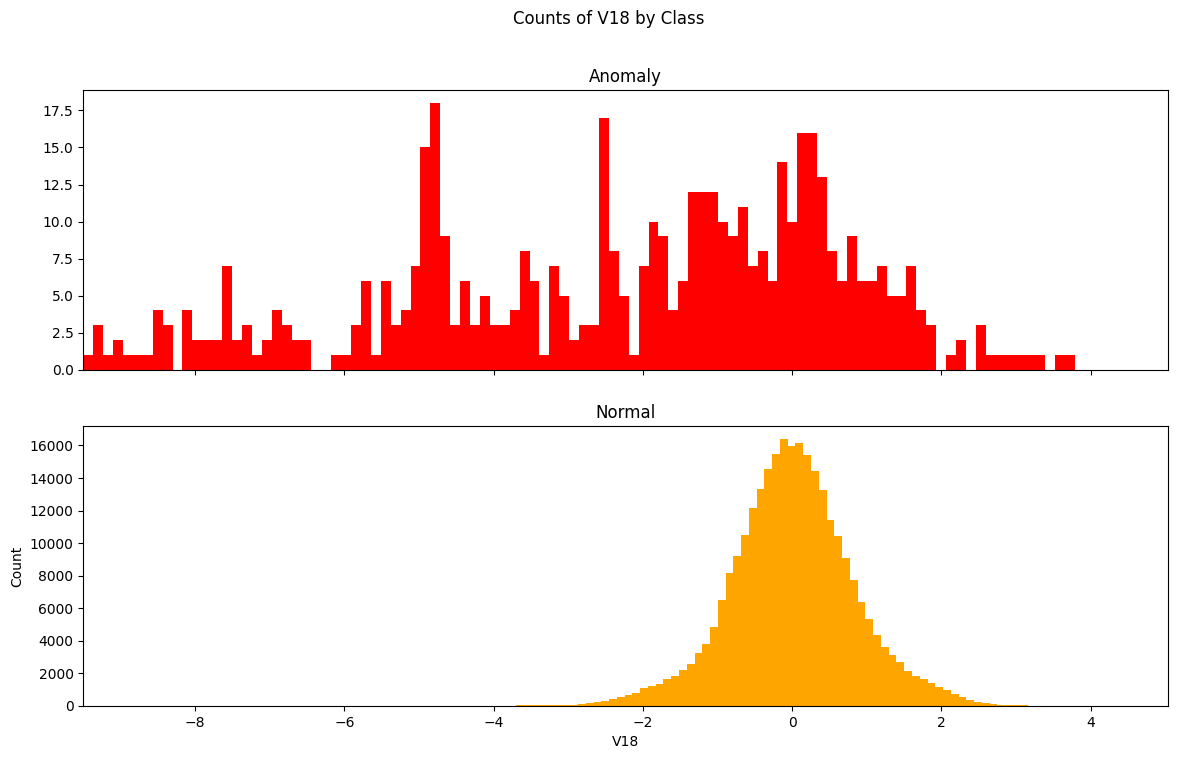

V19 Counts


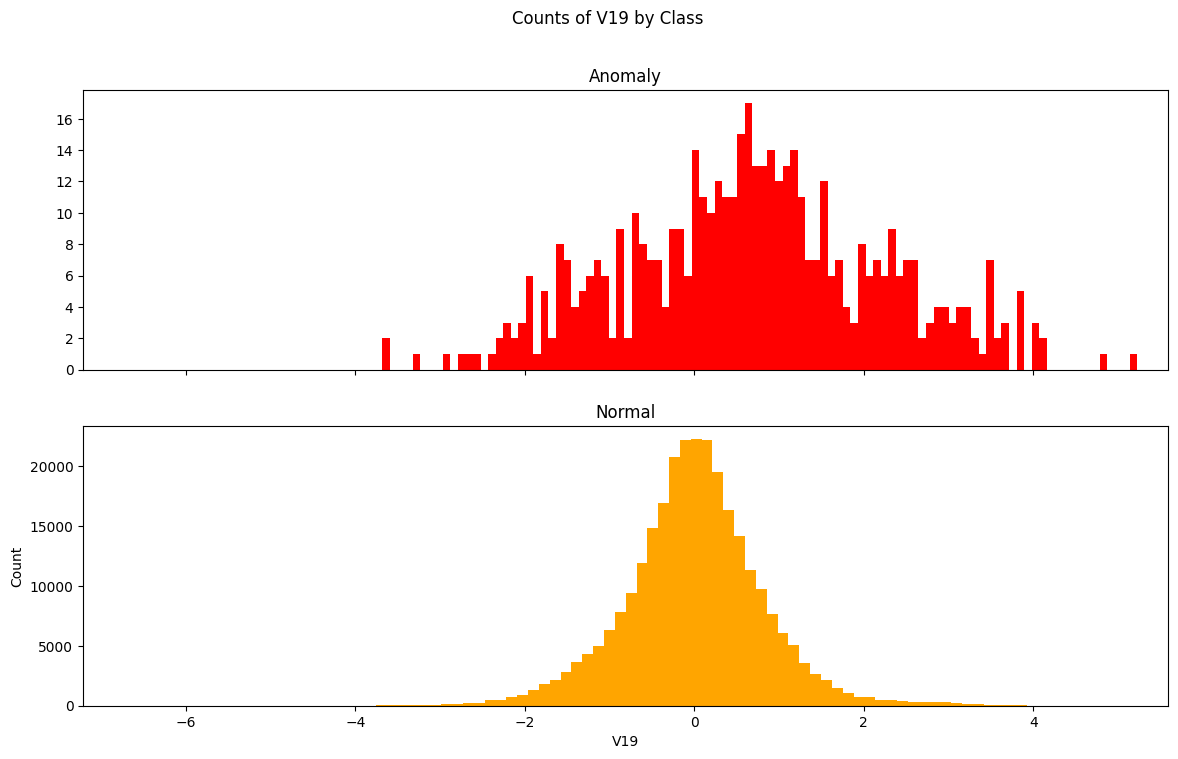

V20 Counts


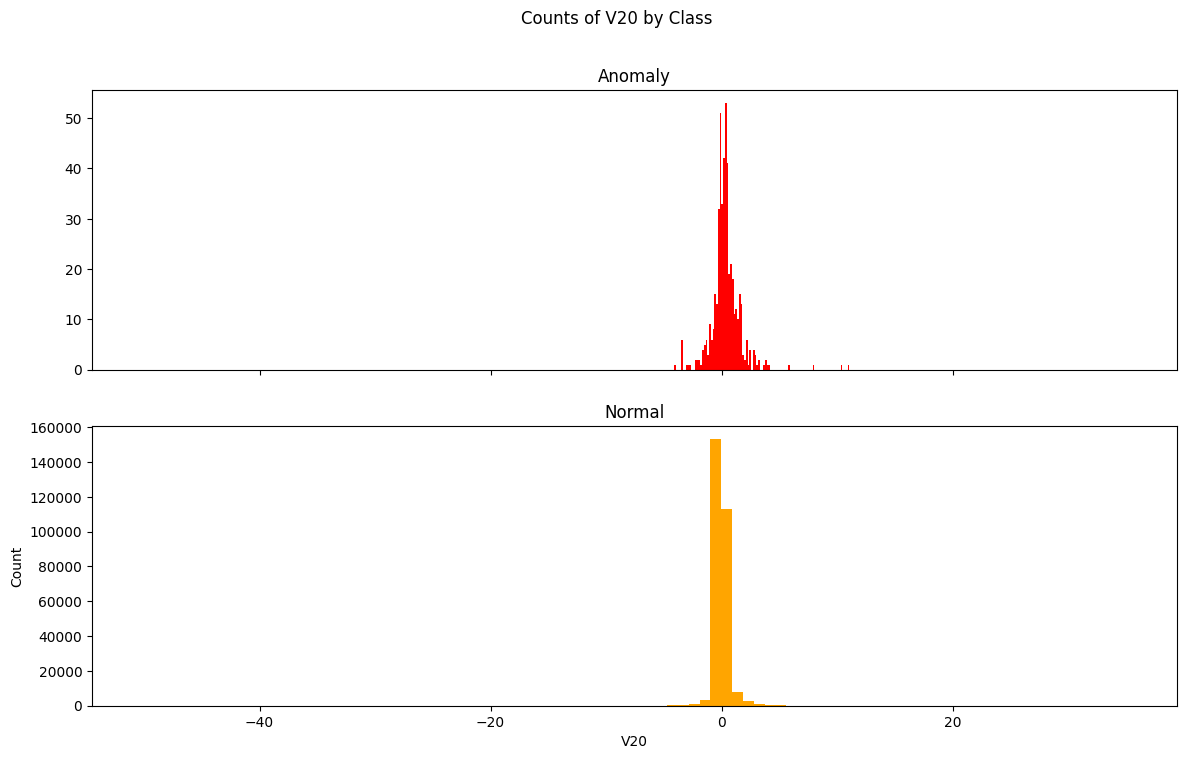

V21 Counts


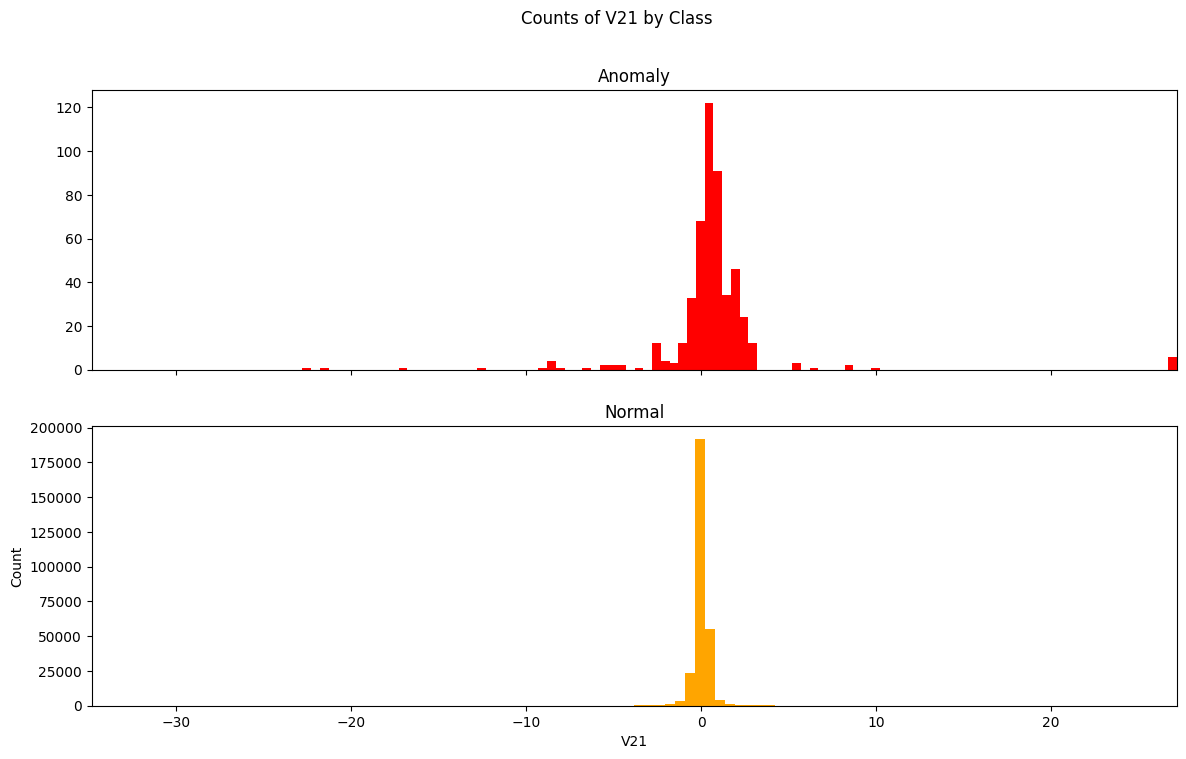

V22 Counts


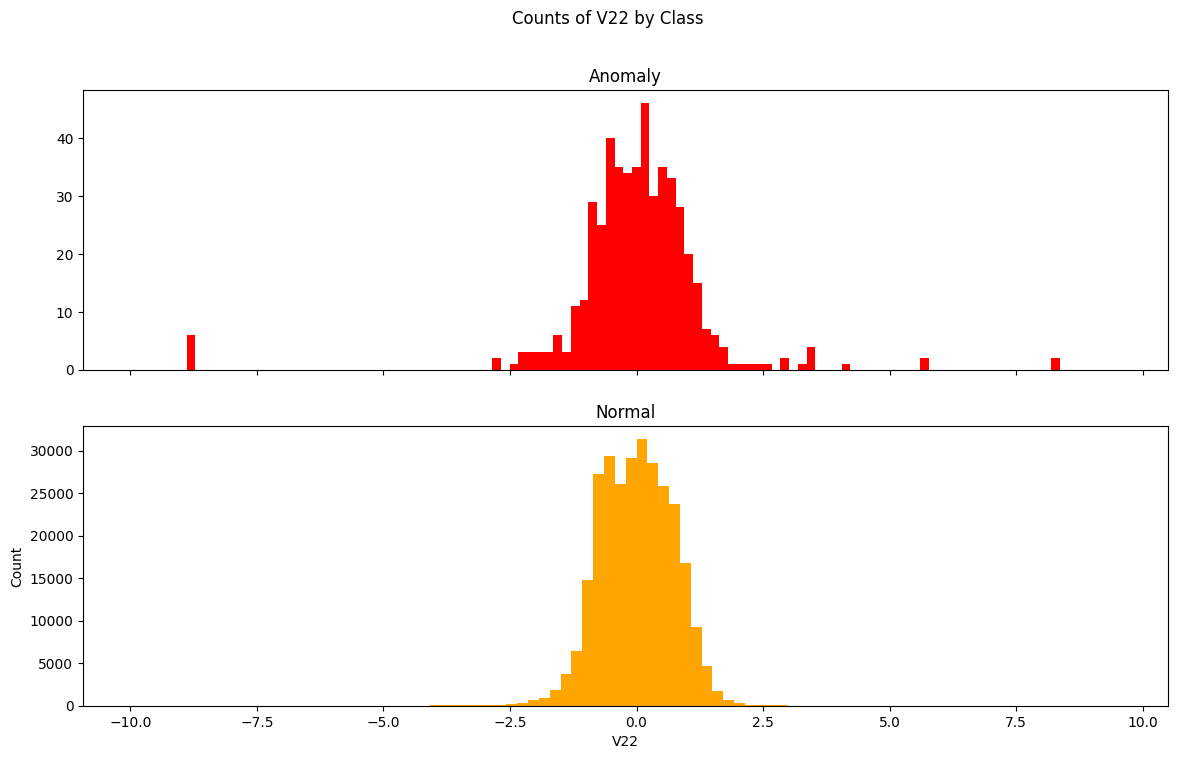

V23 Counts


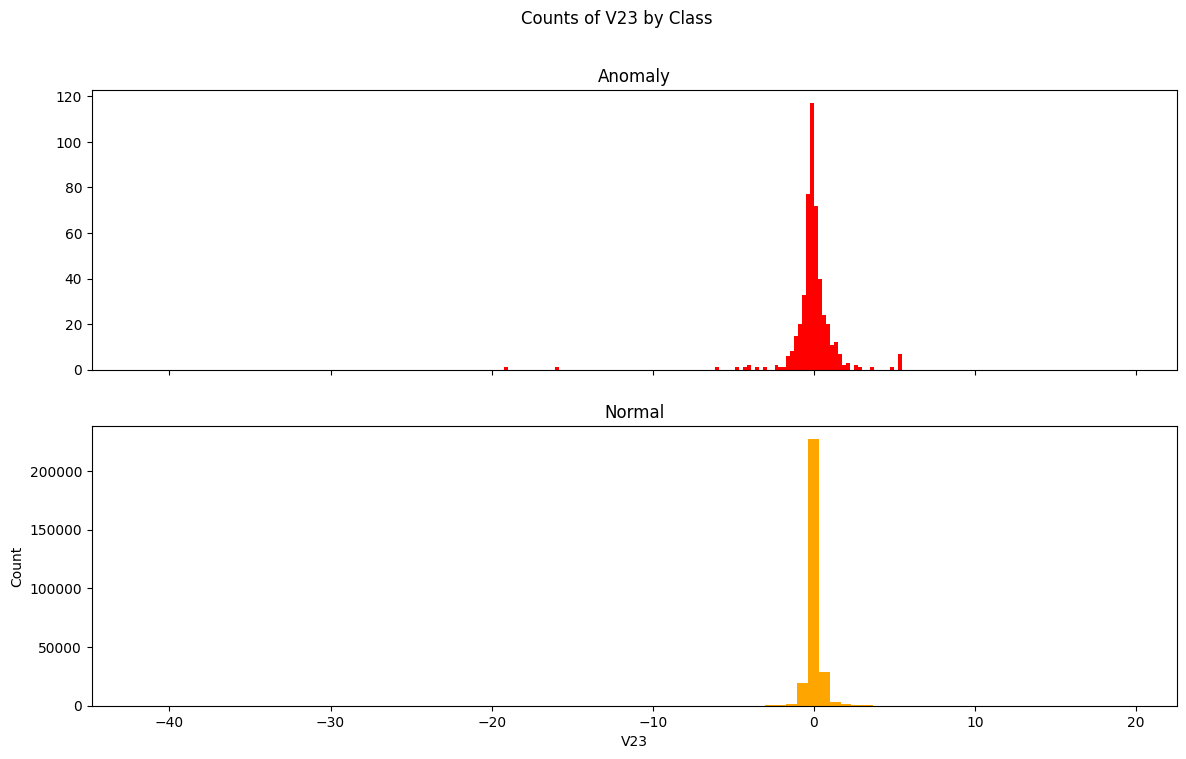

V24 Counts


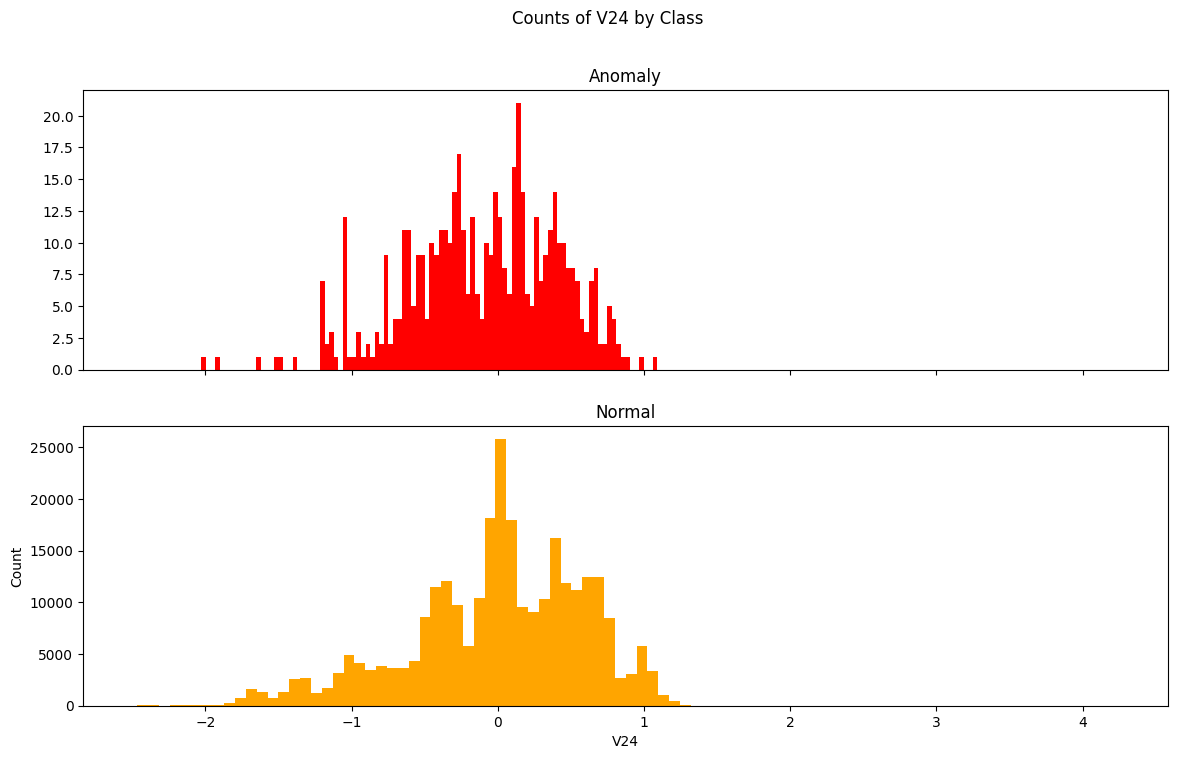

V25 Counts


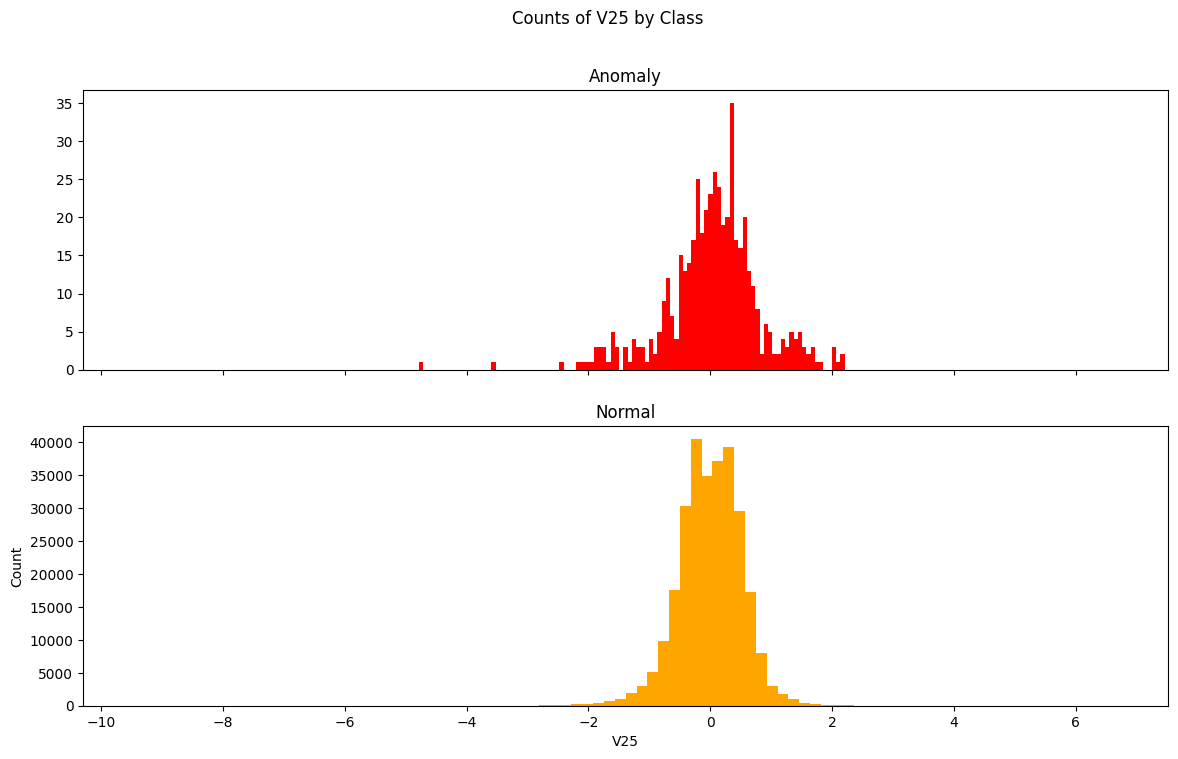

V26 Counts


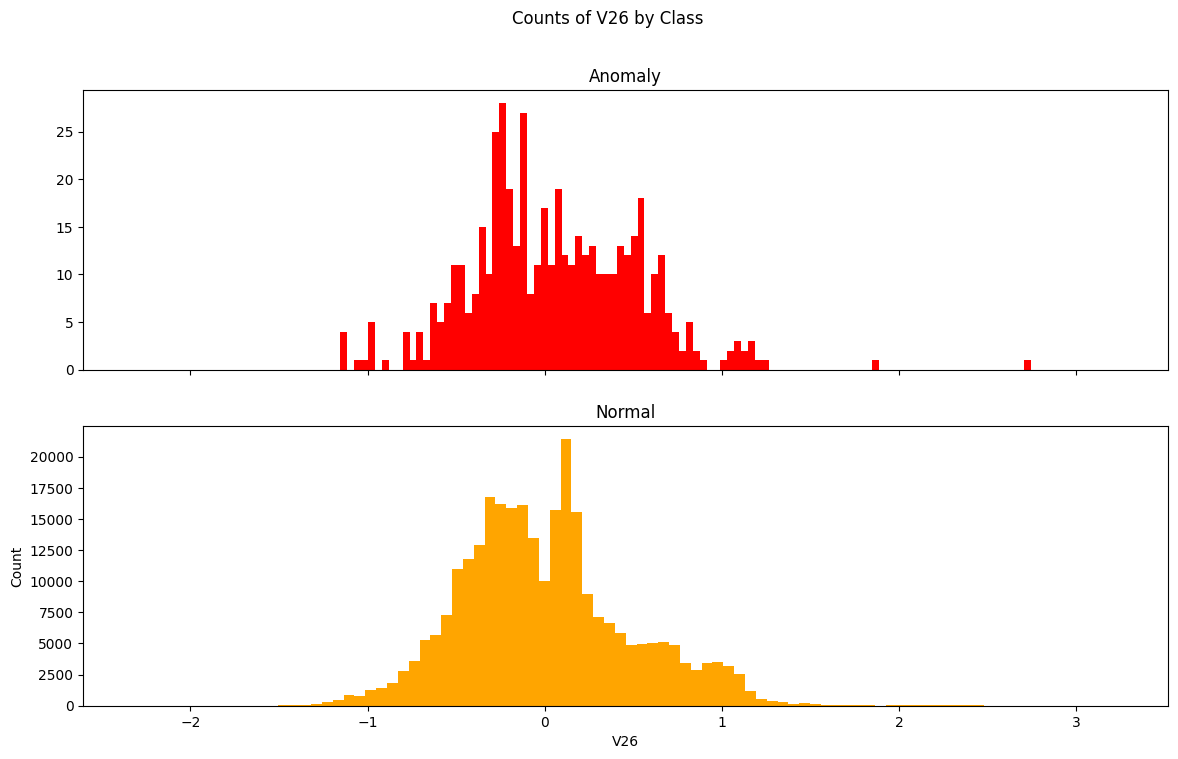

V27 Counts


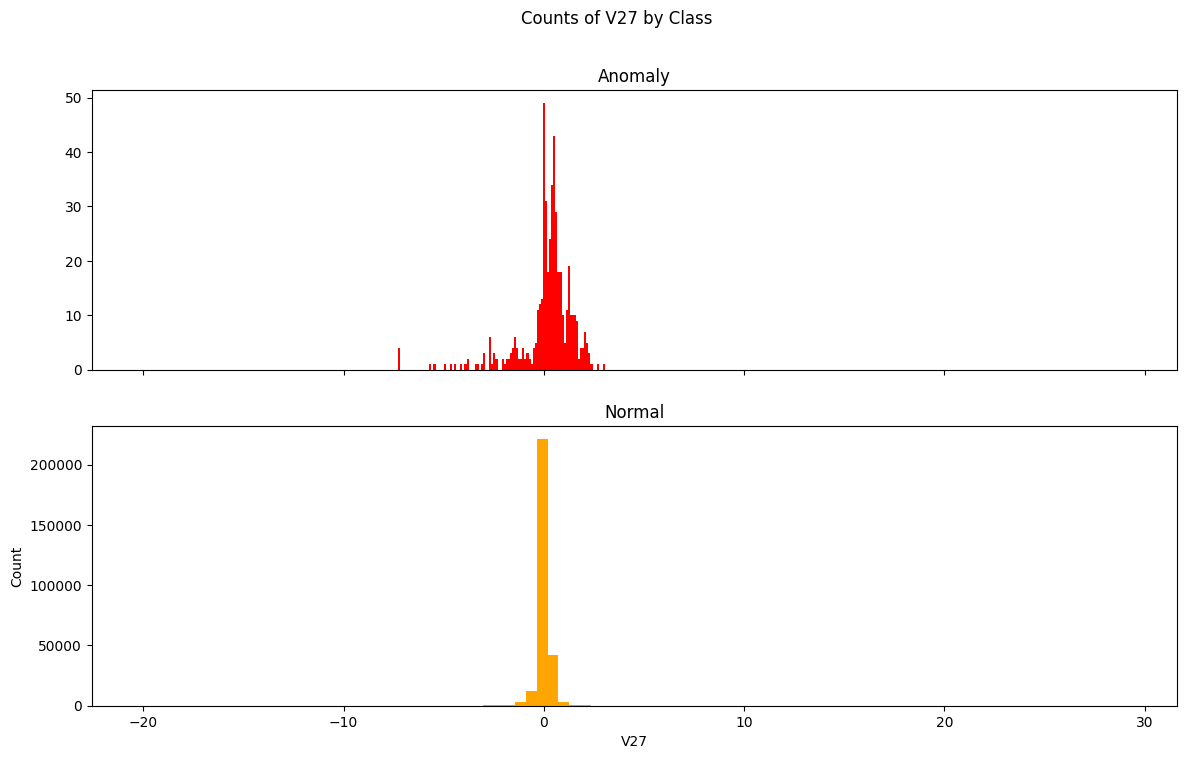

V28 Counts


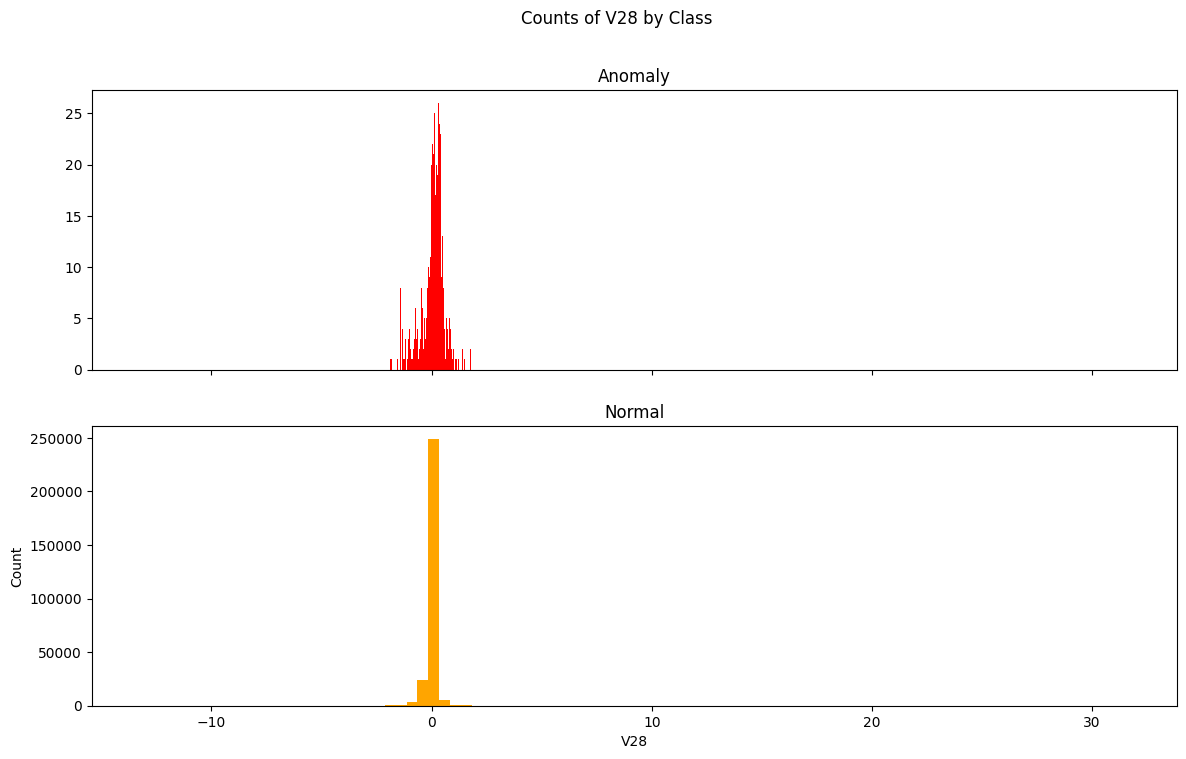

In [24]:
bins = 100
for f in range(1, 29):
    print(f'V{f} Counts')
    plot_histogram(df, bins, f'V{f}')

### 각 칼럼과 Time과의 관계를 살펴봅니다.

V1 vs Time


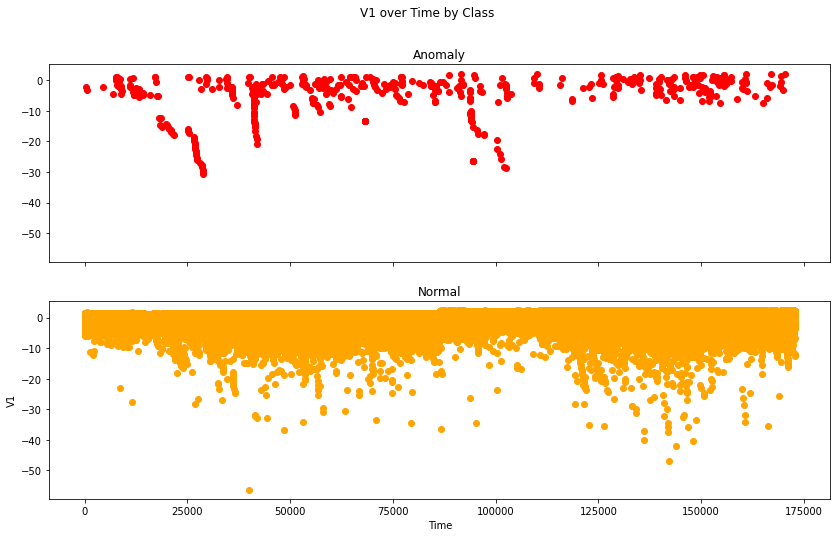

V2 vs Time


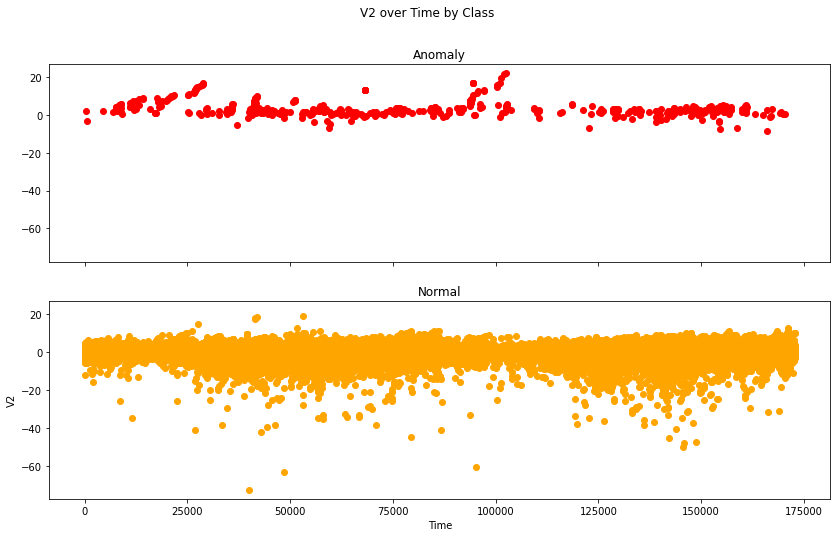

V3 vs Time


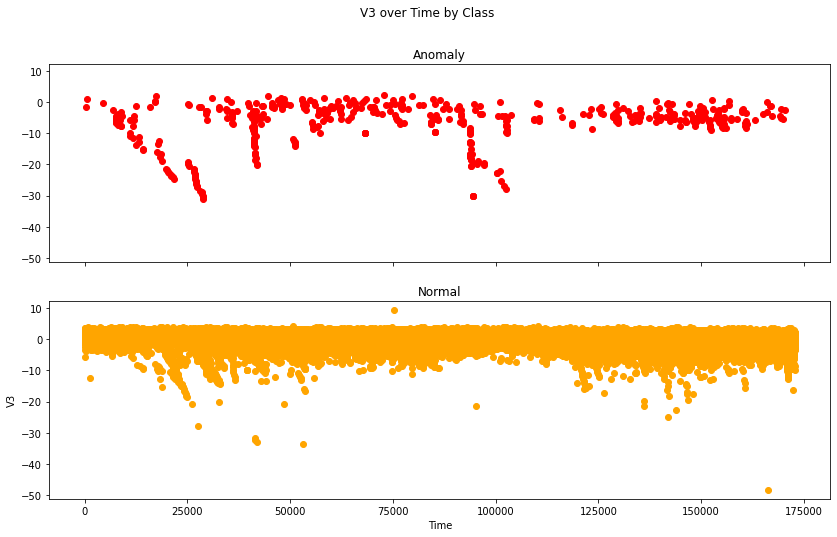

V4 vs Time


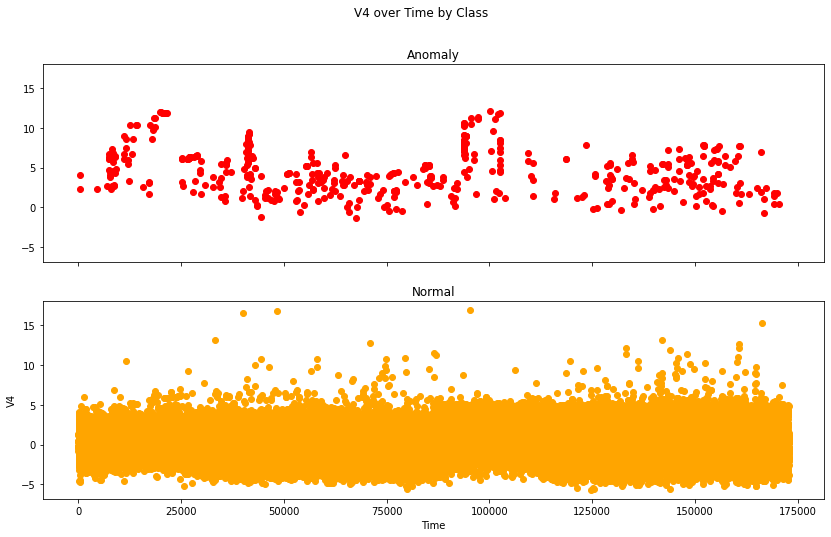

V5 vs Time


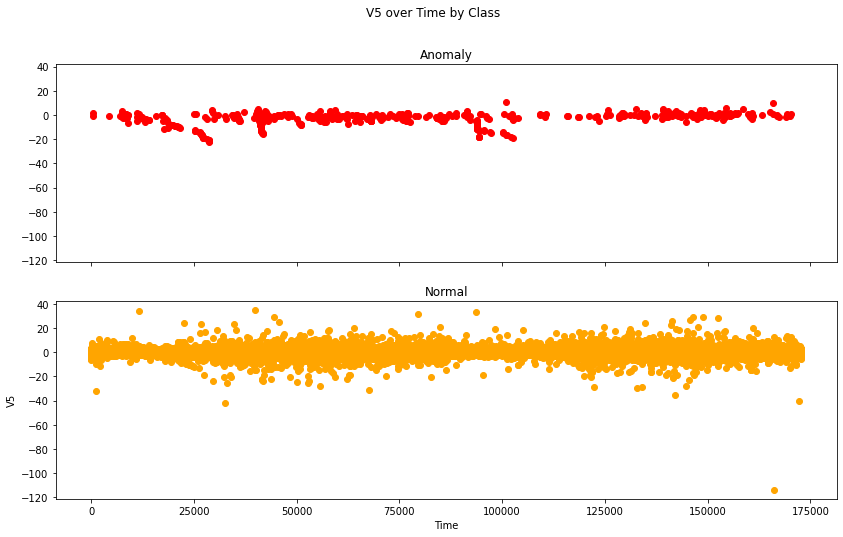

V6 vs Time


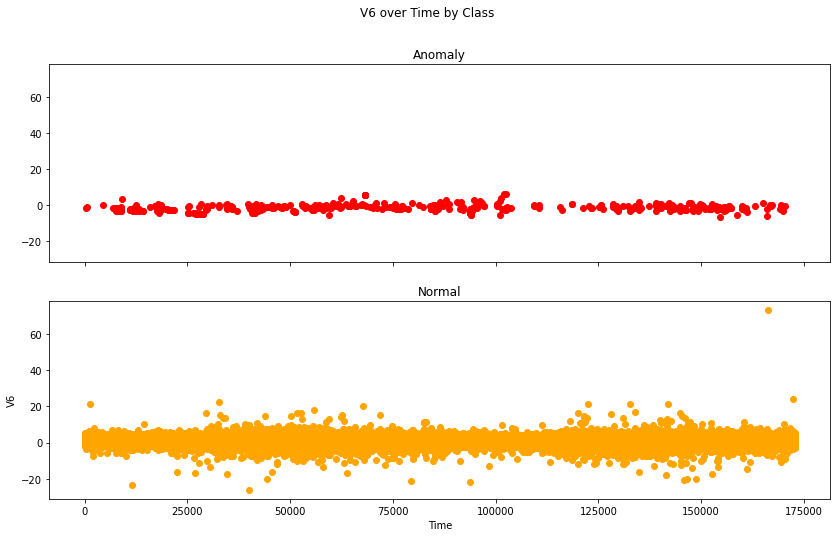

V7 vs Time


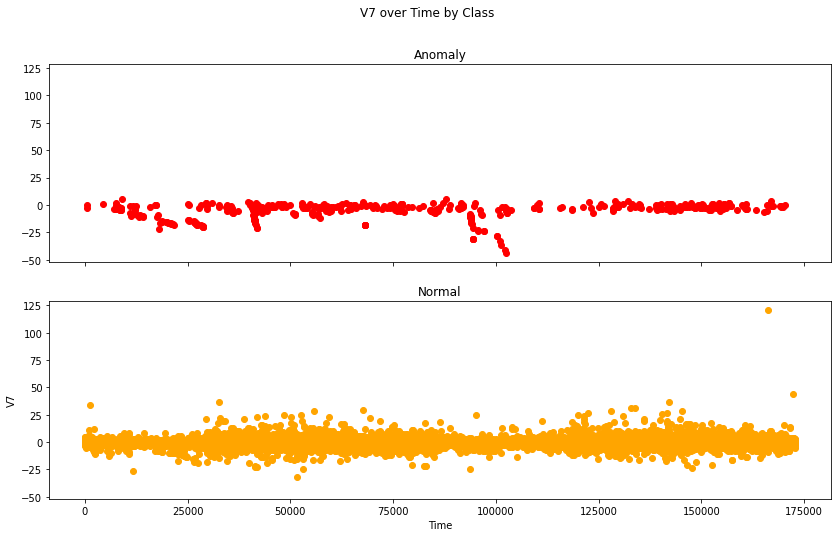

V8 vs Time


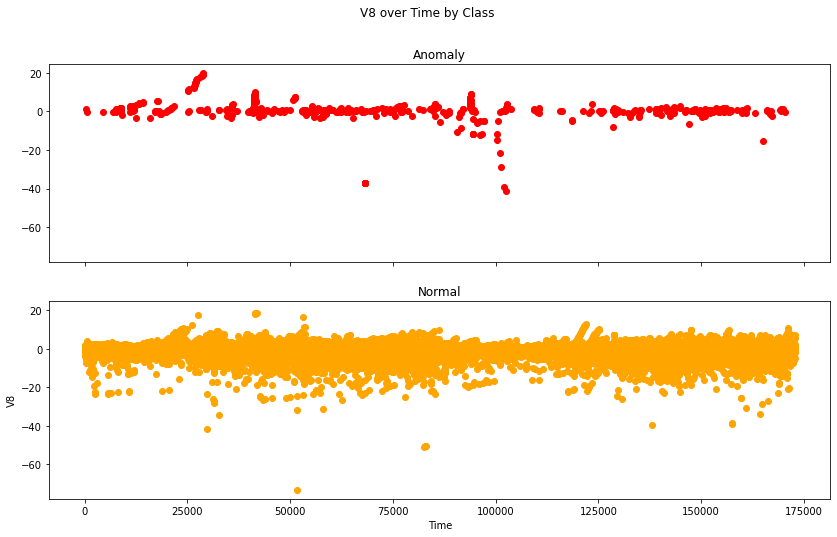

V9 vs Time


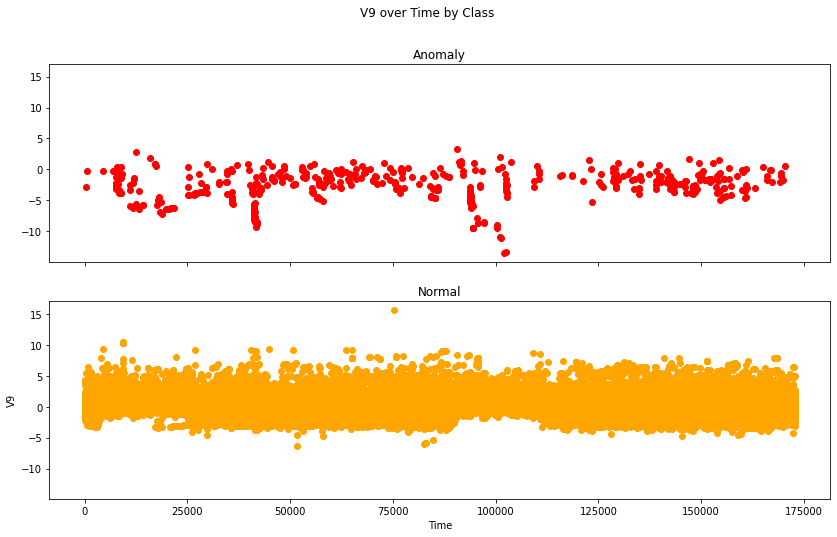

V10 vs Time


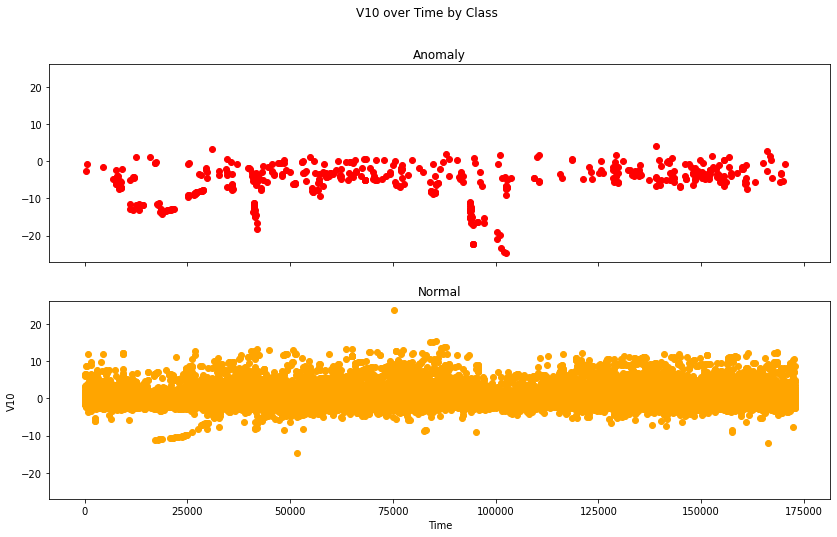

V11 vs Time


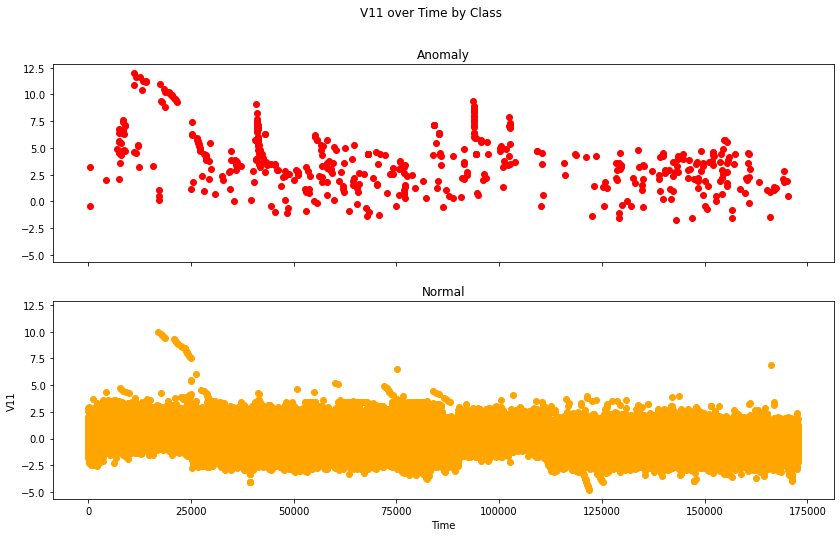

V12 vs Time


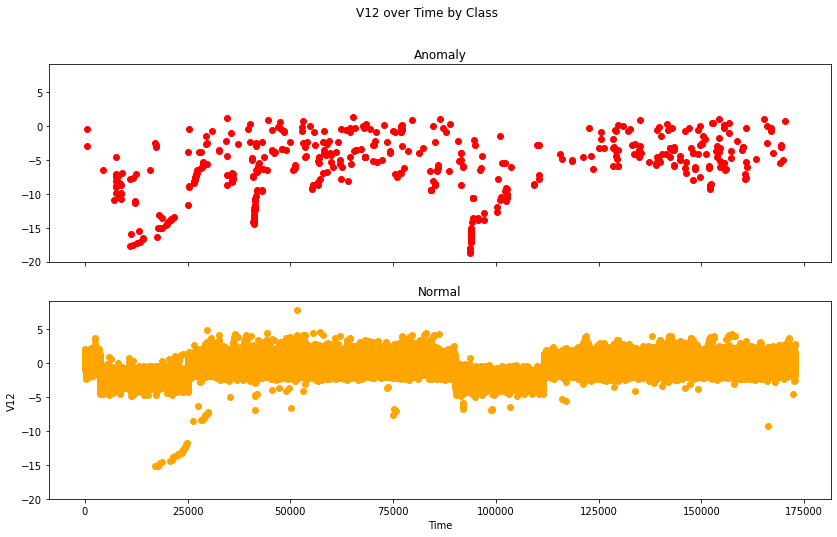

V13 vs Time


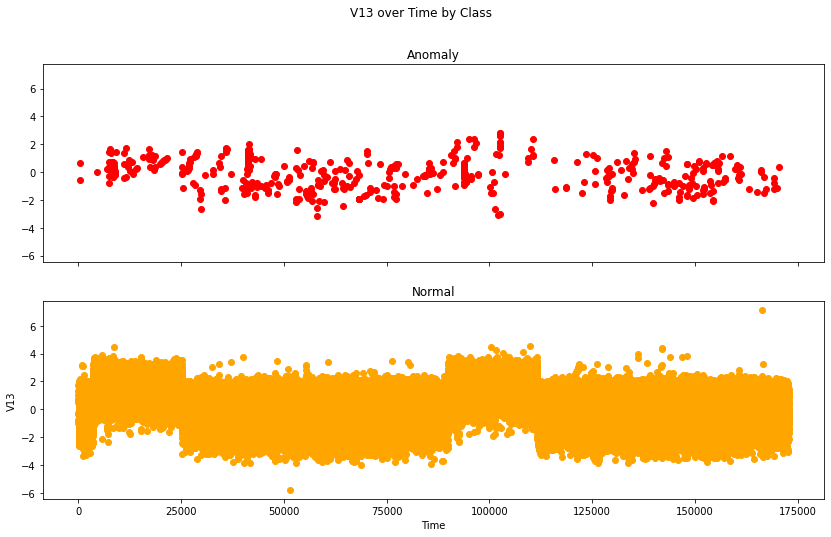

V14 vs Time


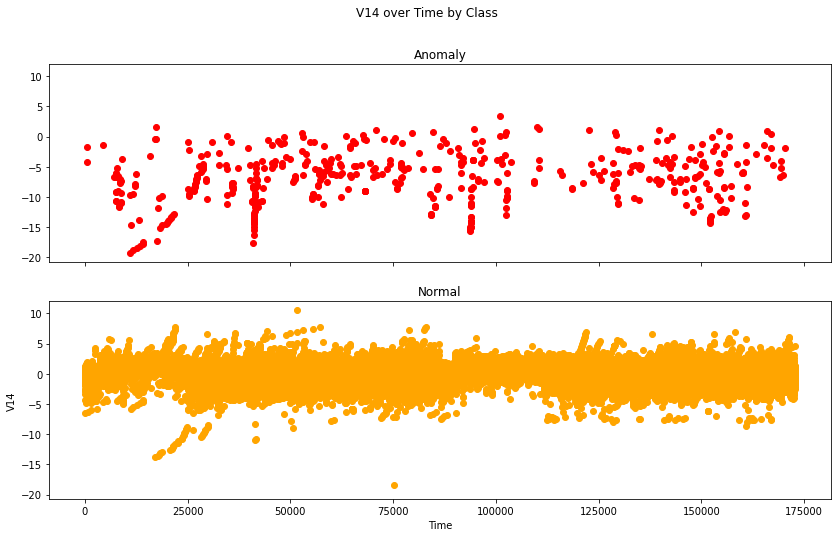

V15 vs Time


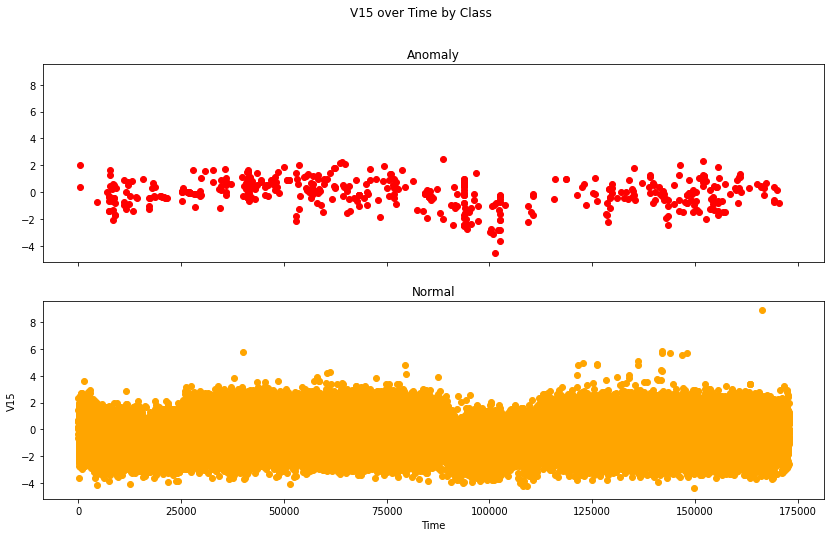

V16 vs Time


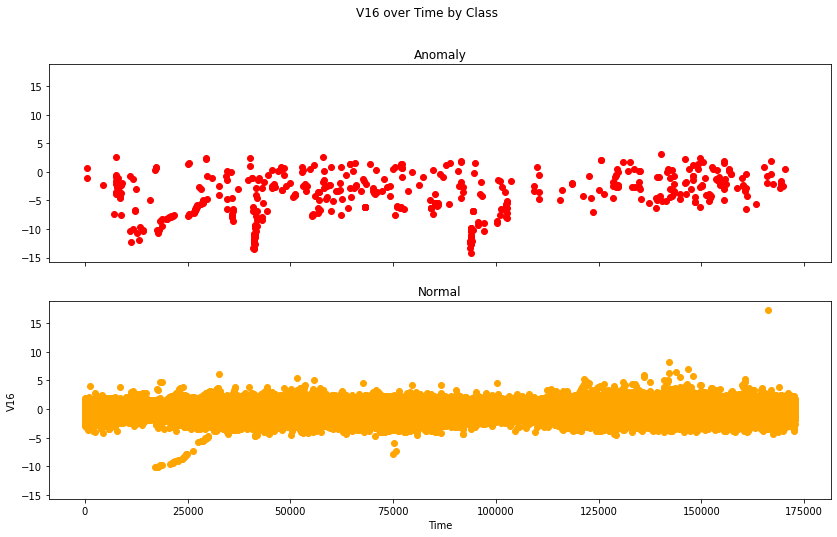

V17 vs Time


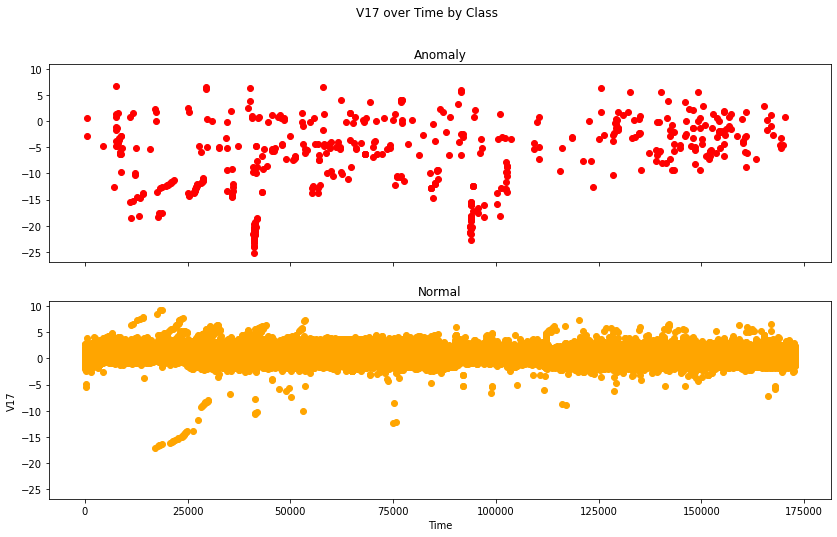

V18 vs Time


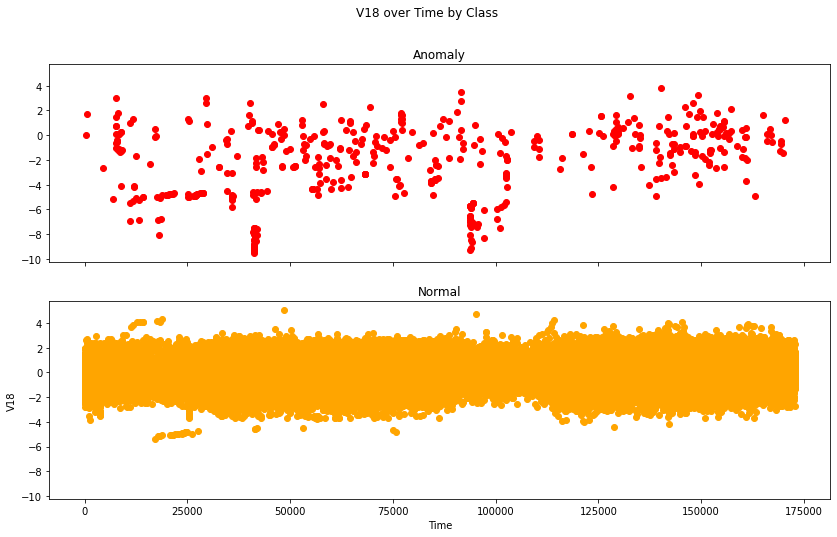

V19 vs Time


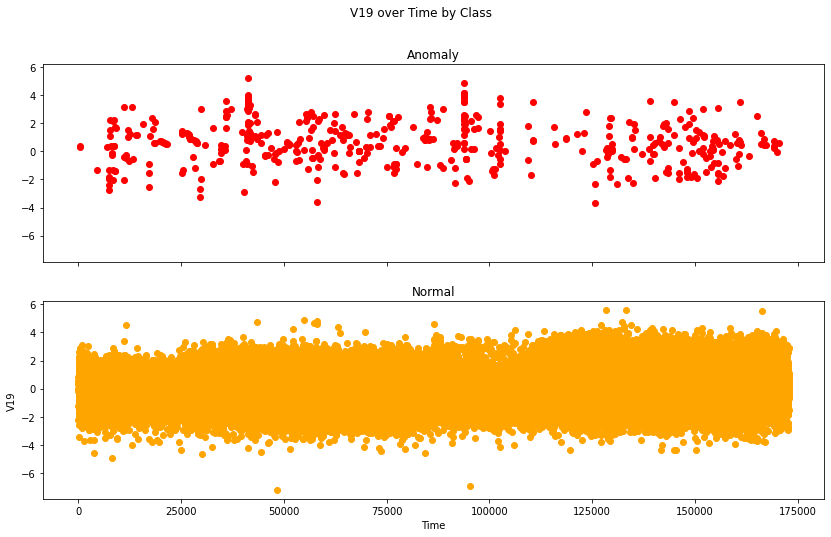

V20 vs Time


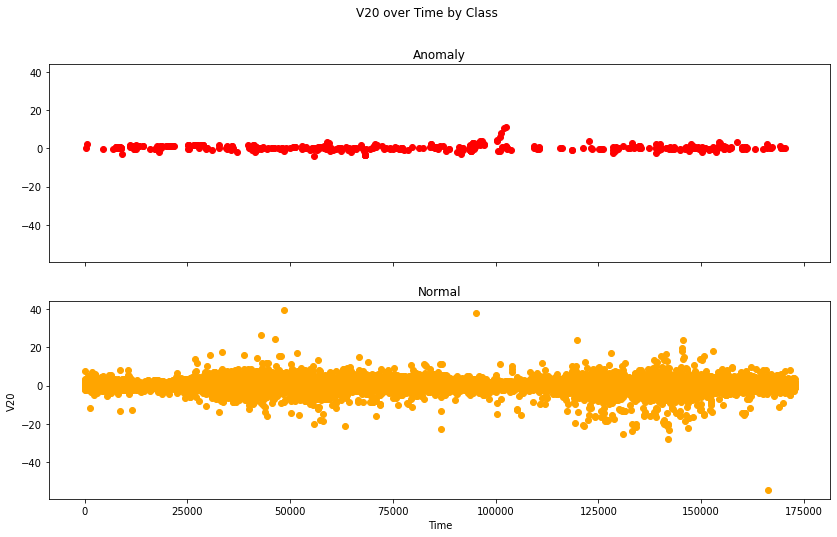

V21 vs Time


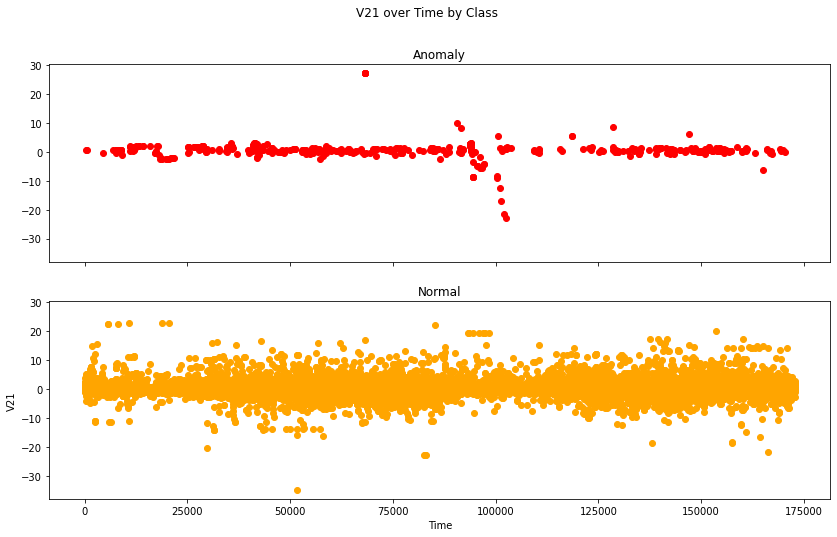

V22 vs Time


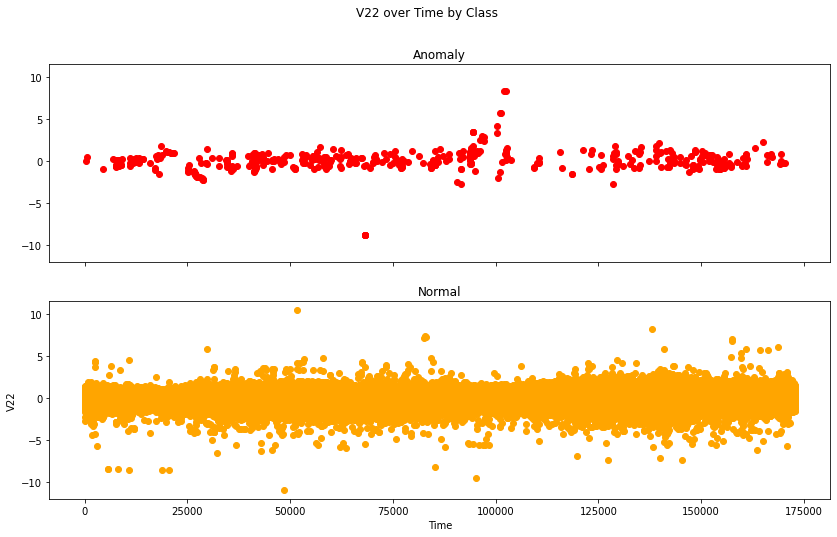

V23 vs Time


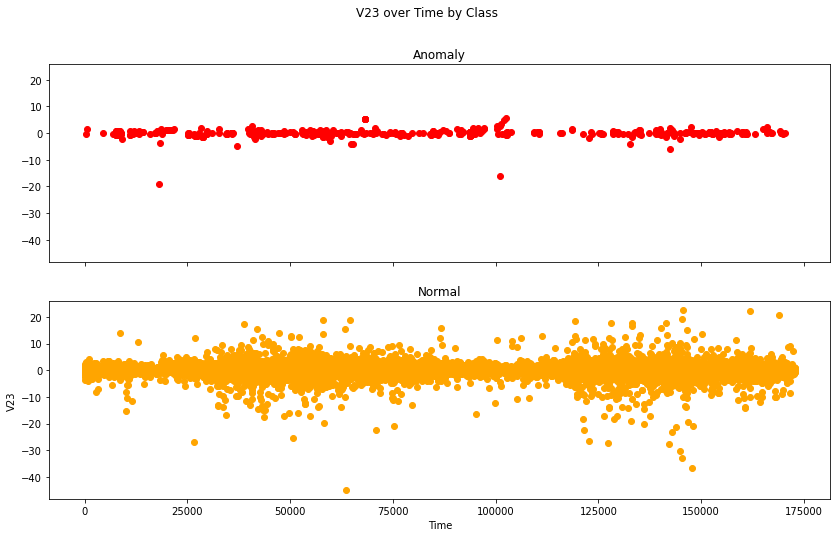

V24 vs Time


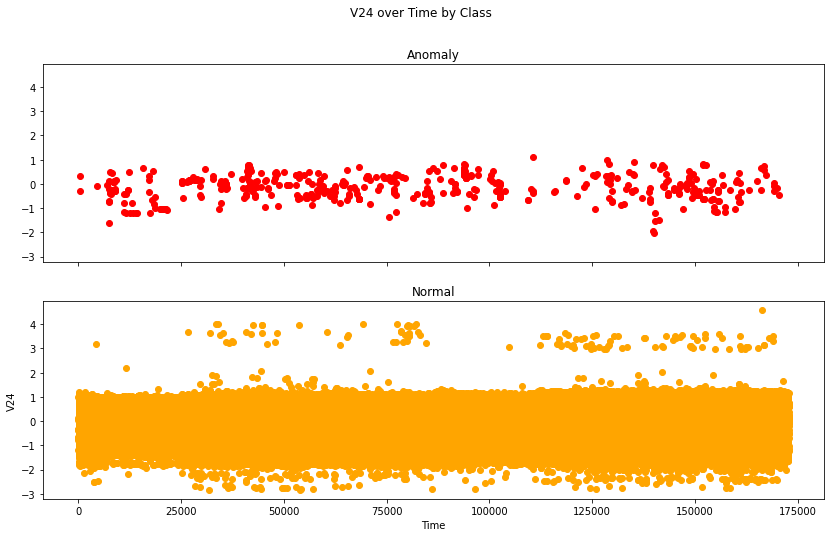

V25 vs Time


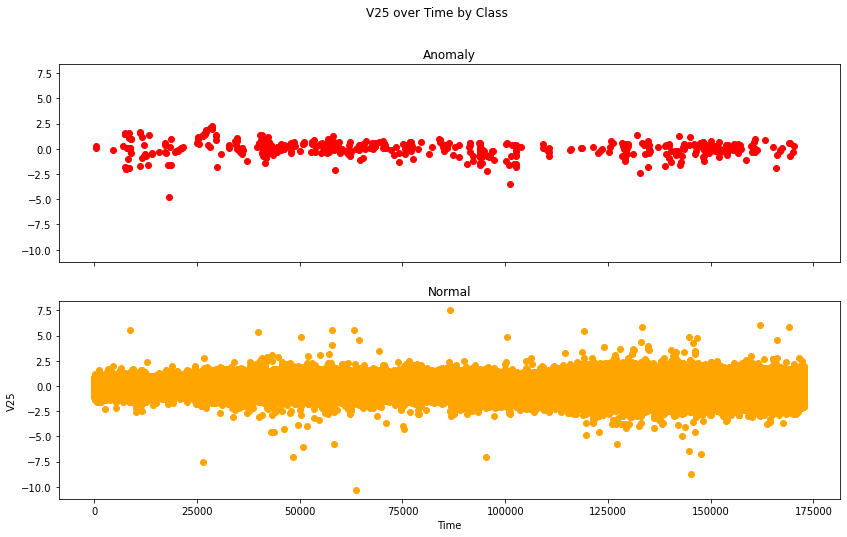

V26 vs Time


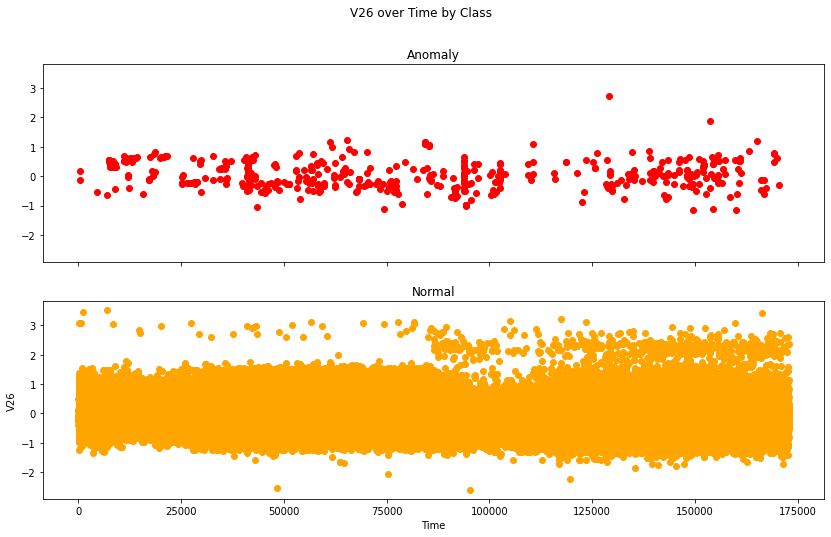

V27 vs Time


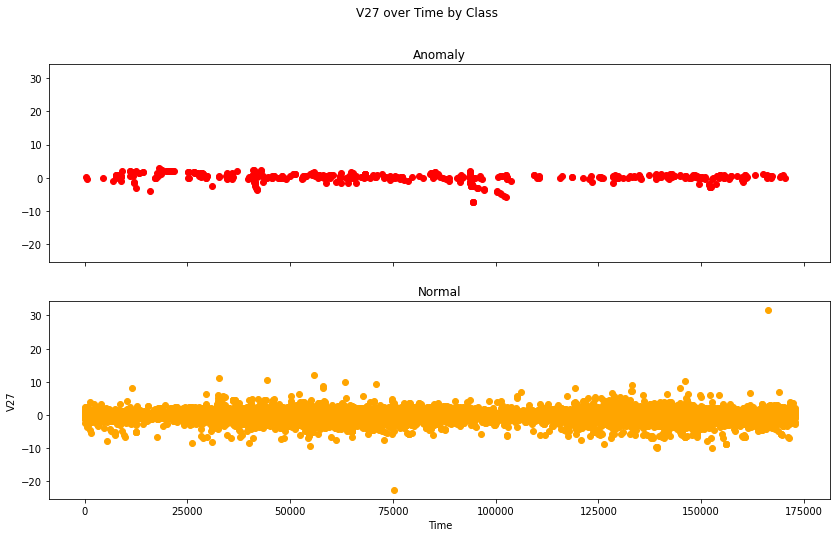

V28 vs Time


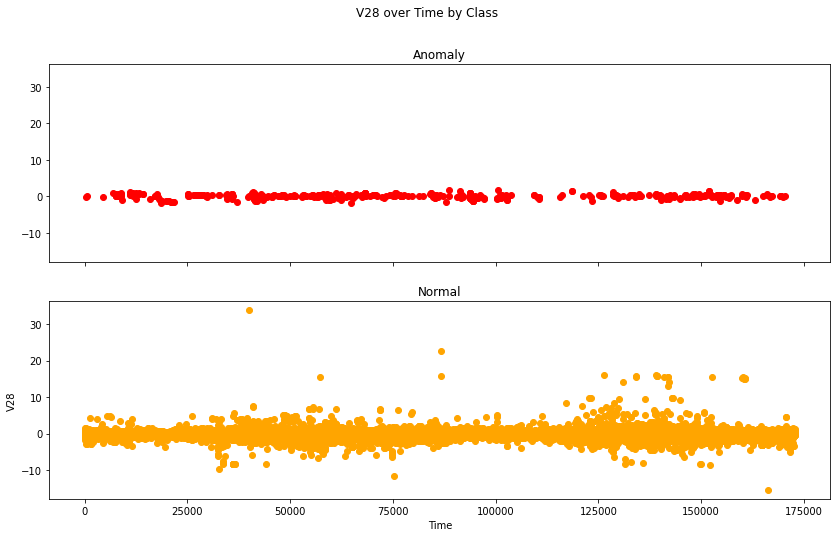

In [37]:
for f in range(1, 29):
    print(f'V{f} vs Time')
    plot_scatter(df, "Time", f'V{f}', sharey=True)  

### 각 칼럼과 Amount과의 관계를 살펴봅니다.

Amount vs V1


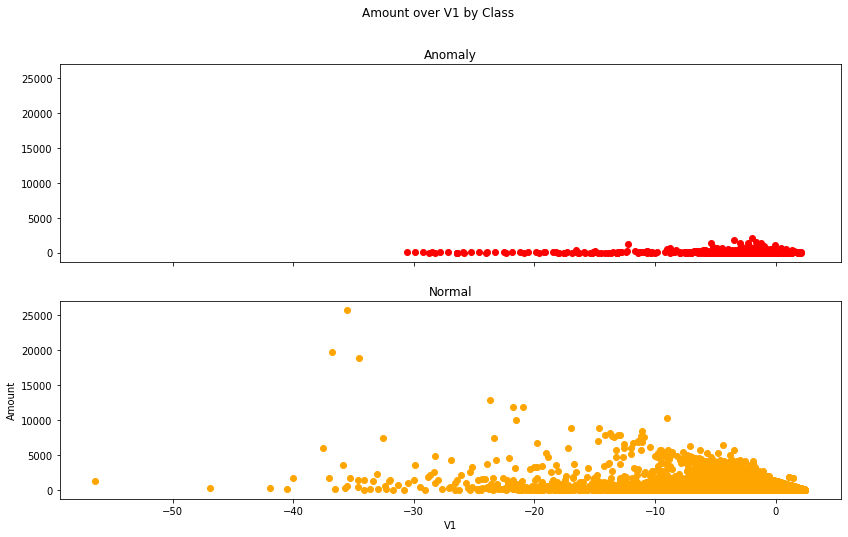

Amount vs V2


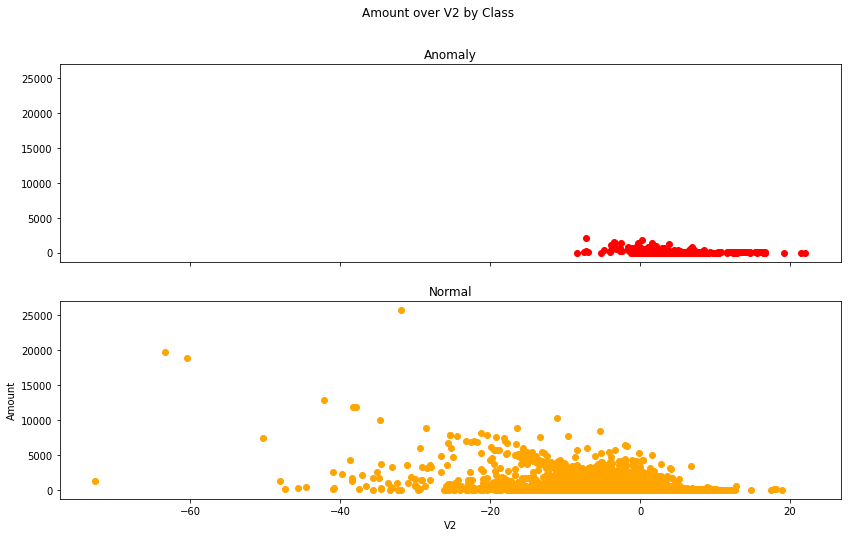

Amount vs V3


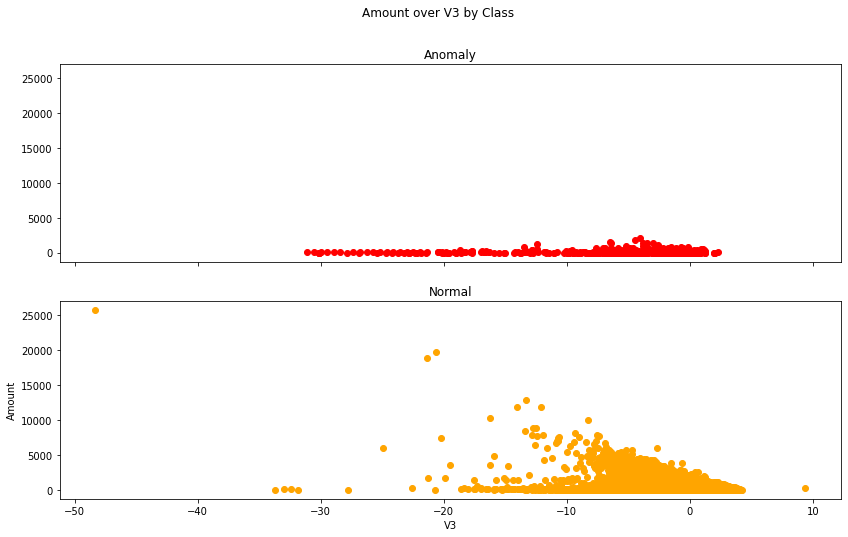

Amount vs V4


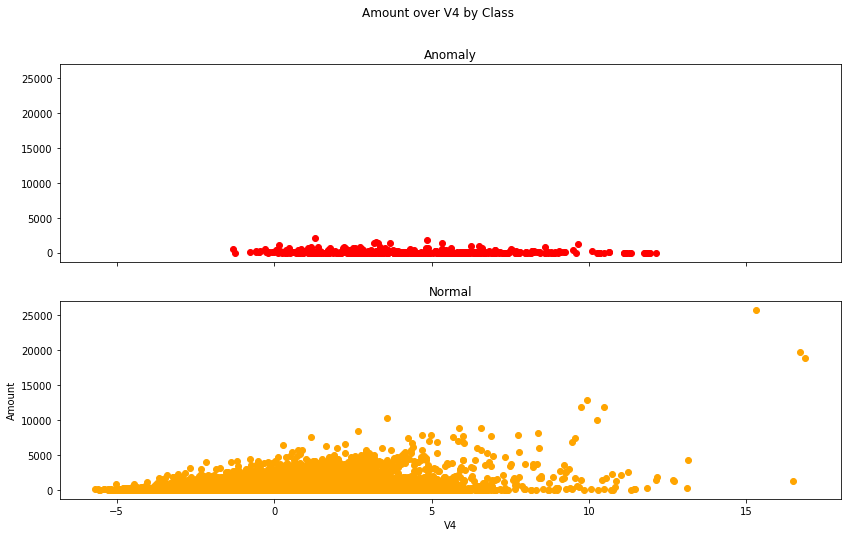

Amount vs V5


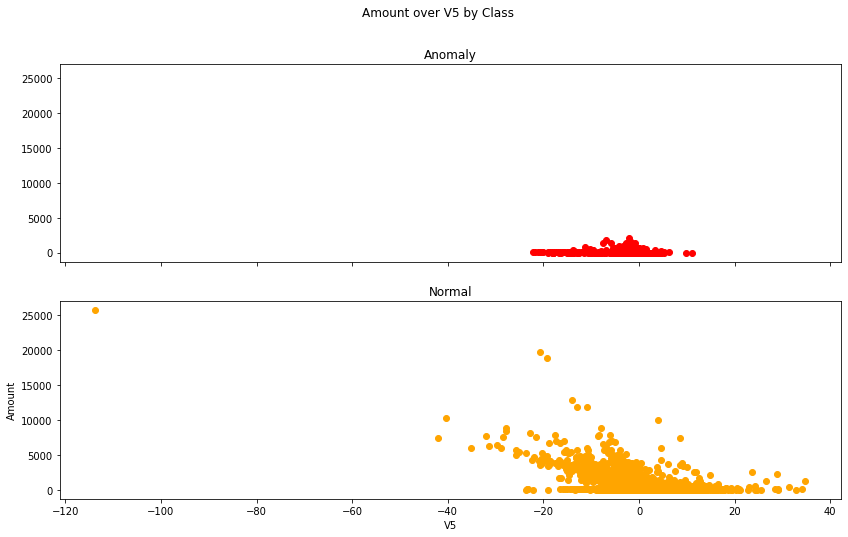

Amount vs V6


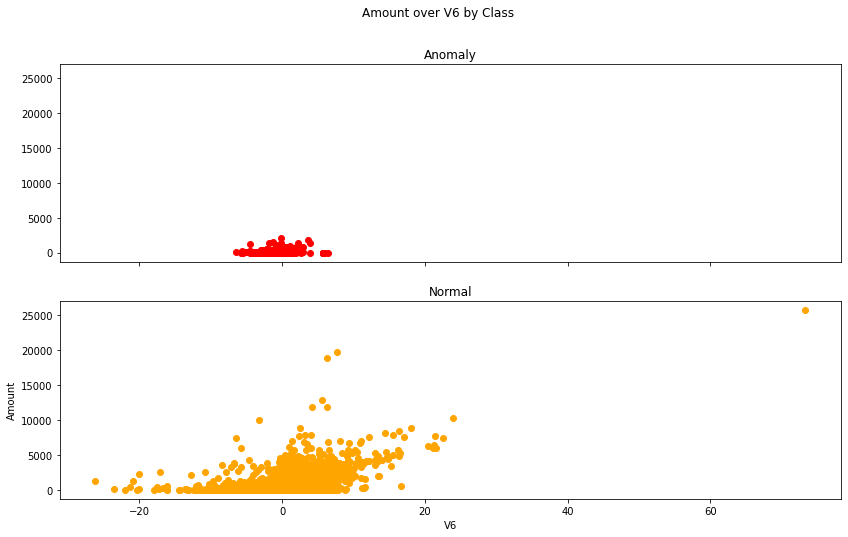

Amount vs V7


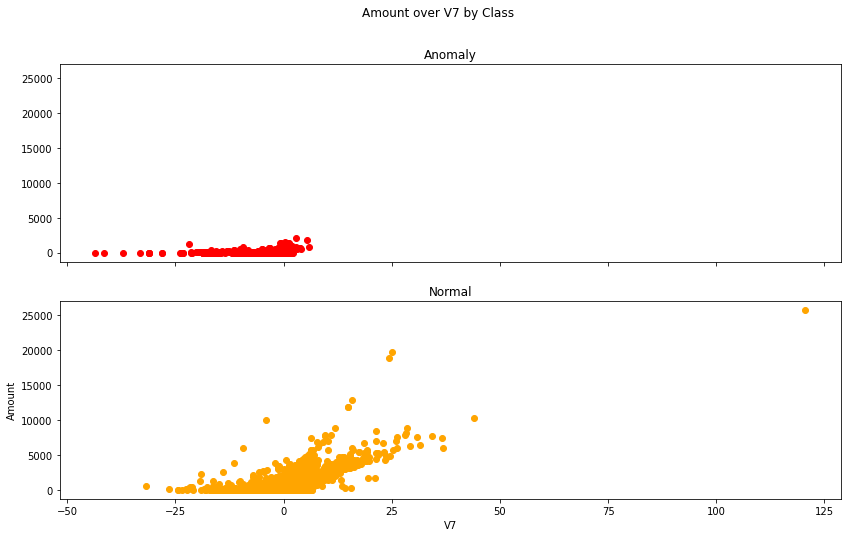

Amount vs V8


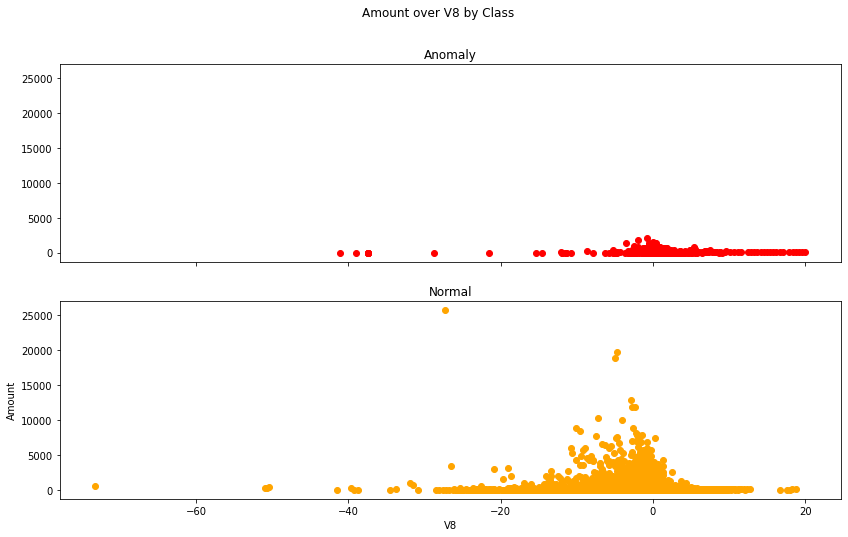

Amount vs V9


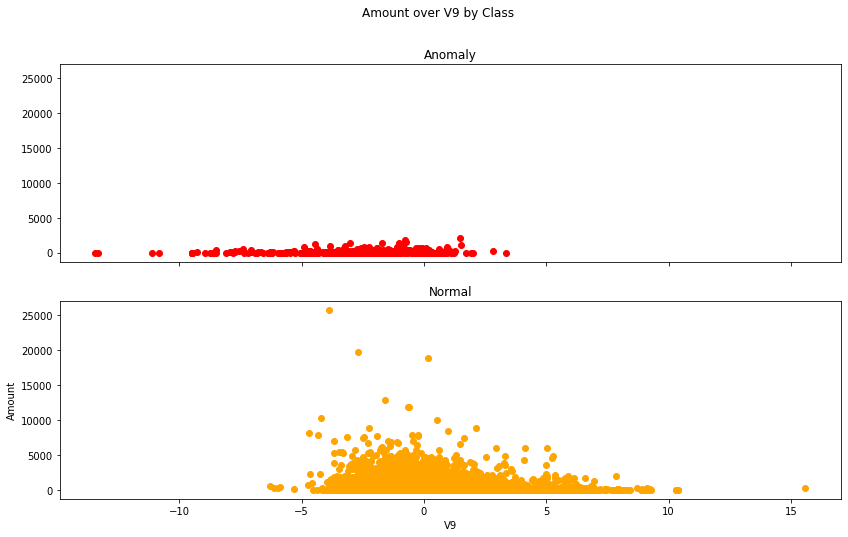

Amount vs V10


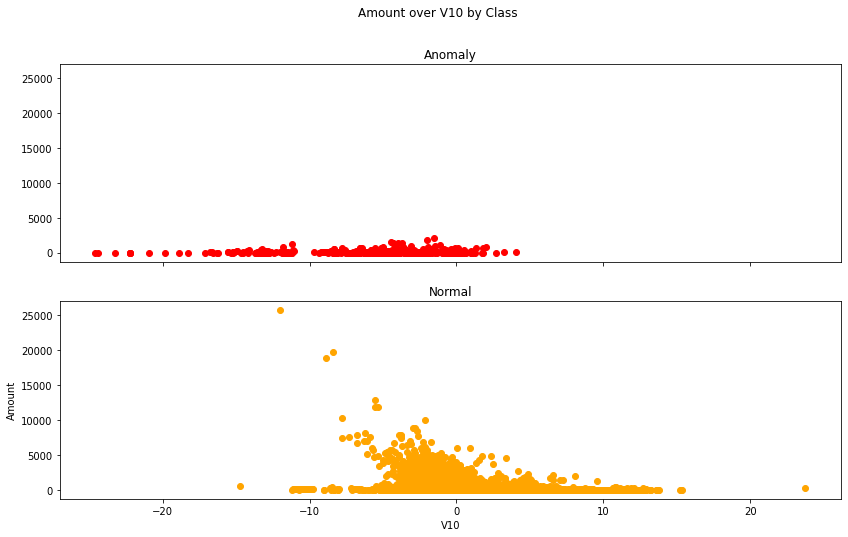

Amount vs V11


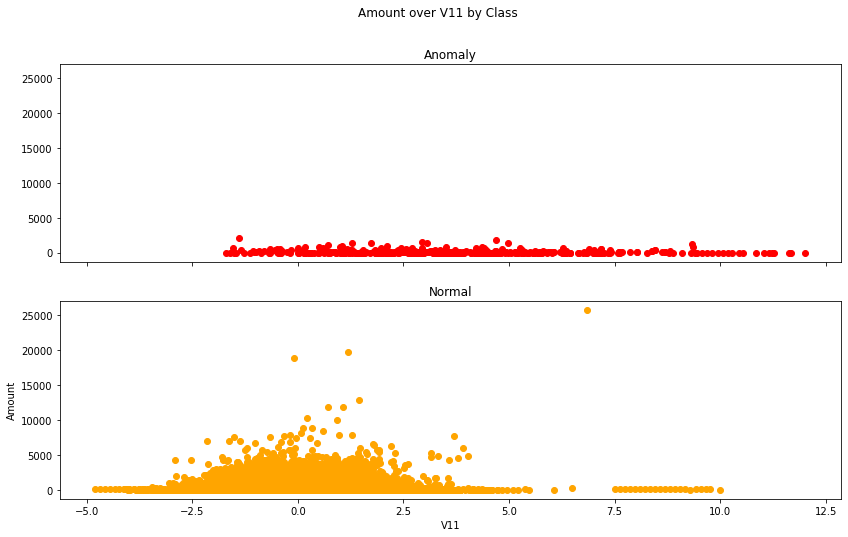

Amount vs V12


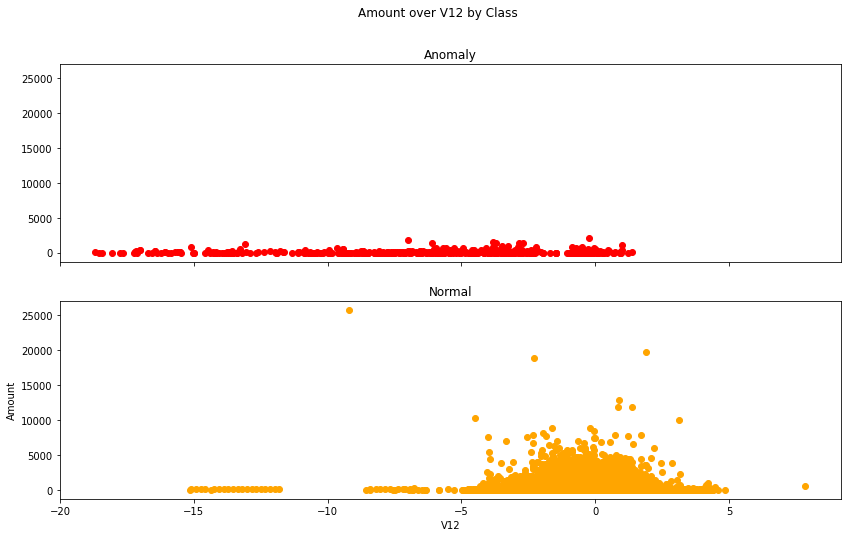

Amount vs V13


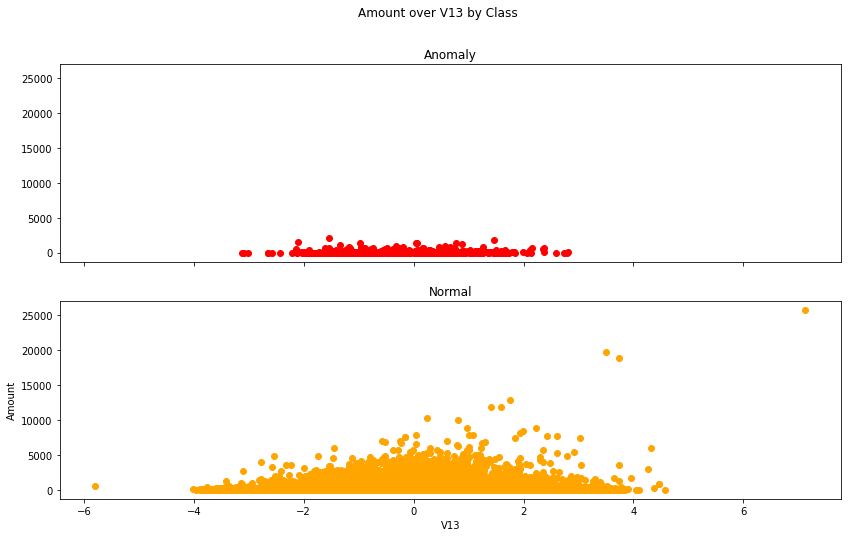

Amount vs V14


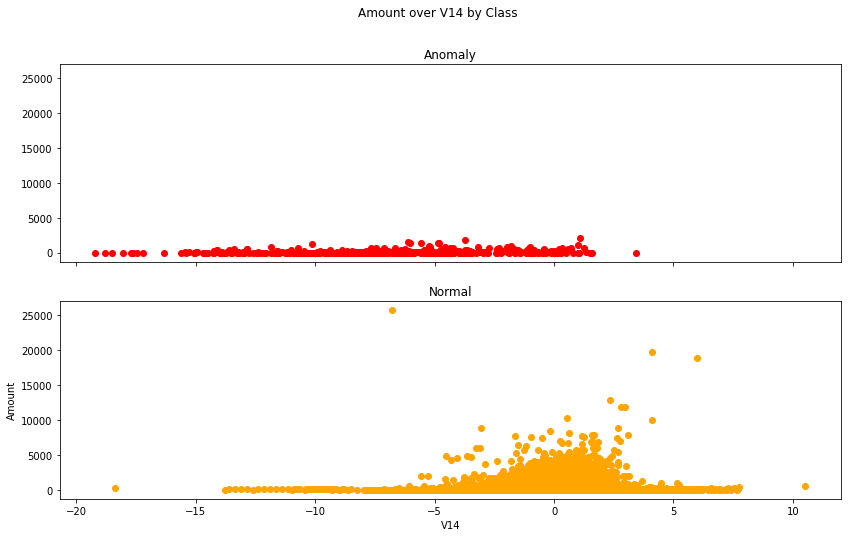

Amount vs V15


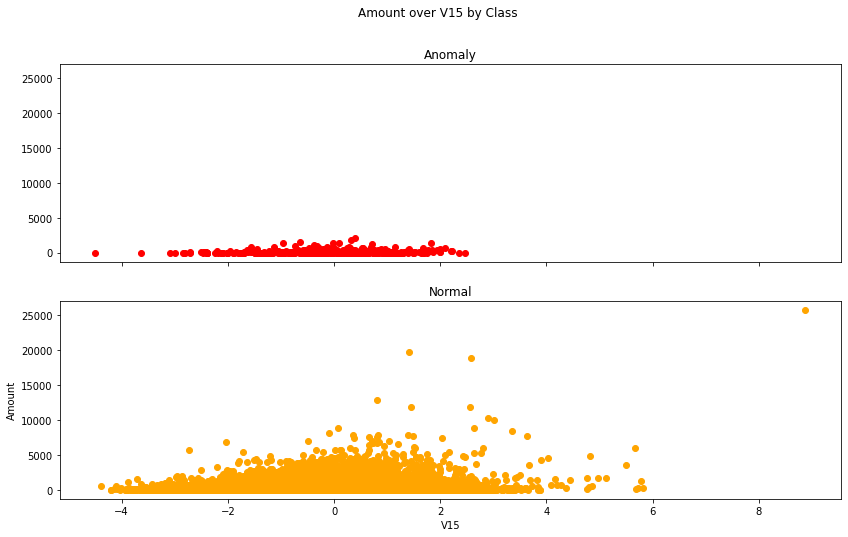

Amount vs V16


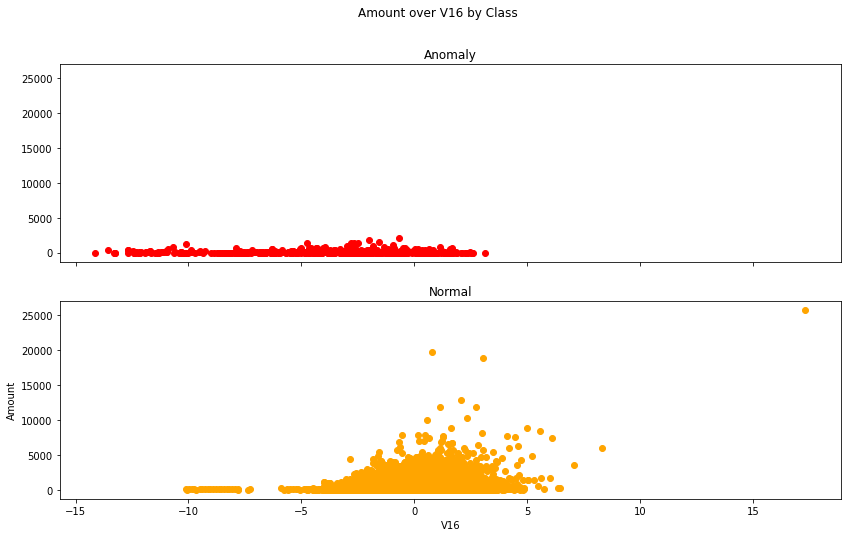

Amount vs V17


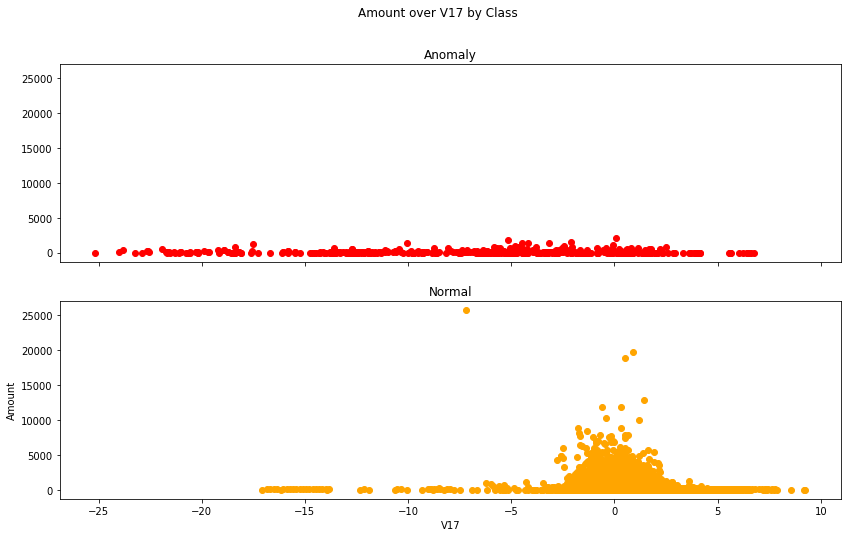

Amount vs V18


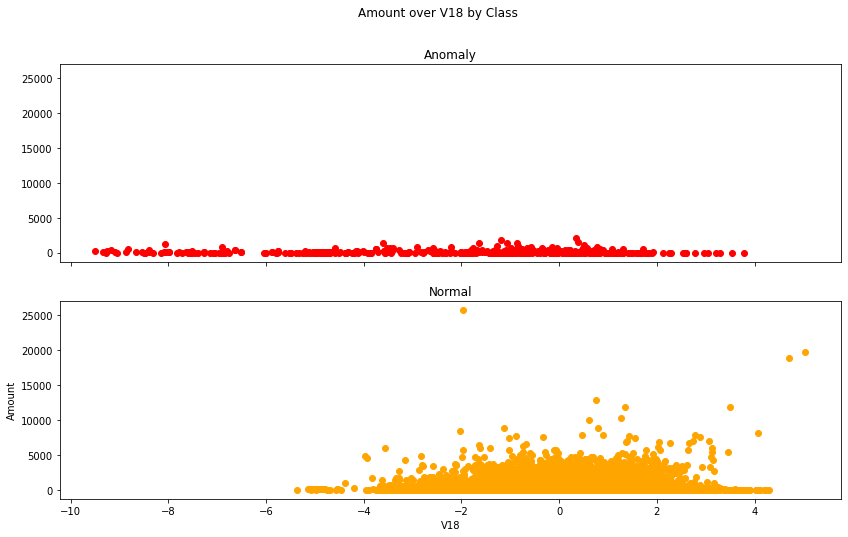

Amount vs V19


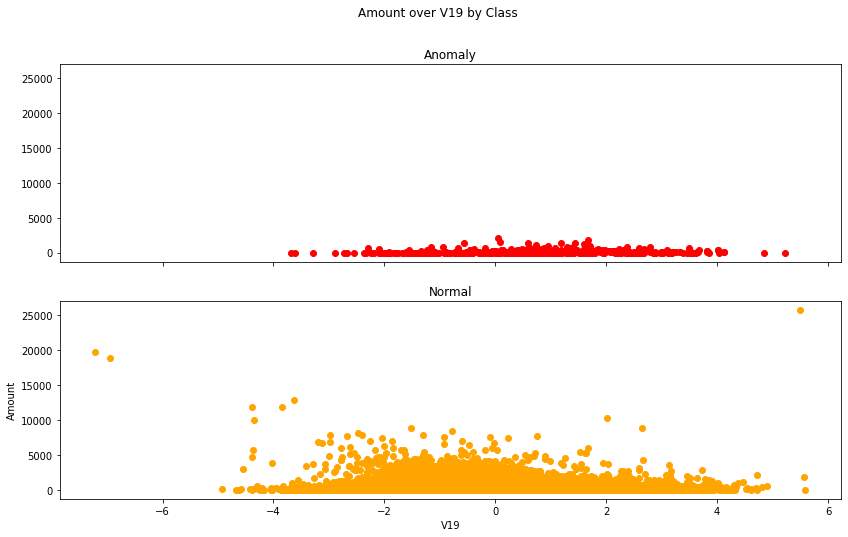

Amount vs V20


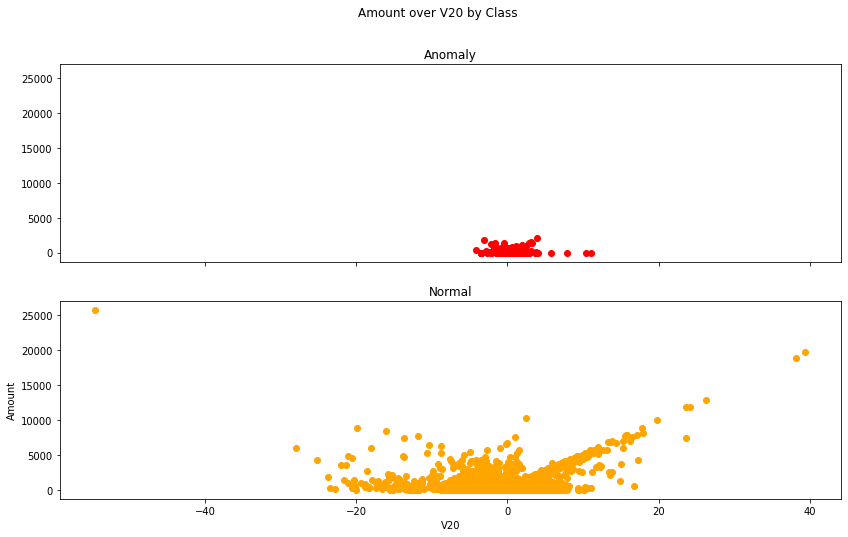

Amount vs V21


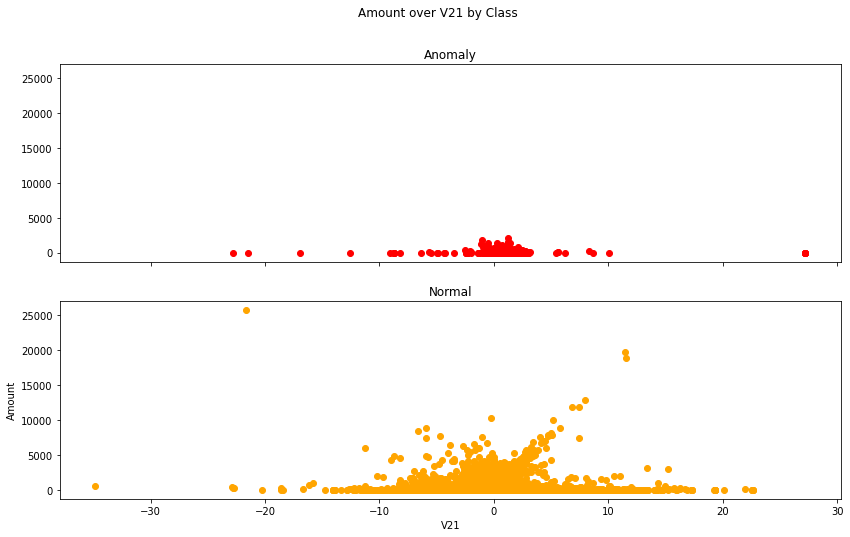

Amount vs V22


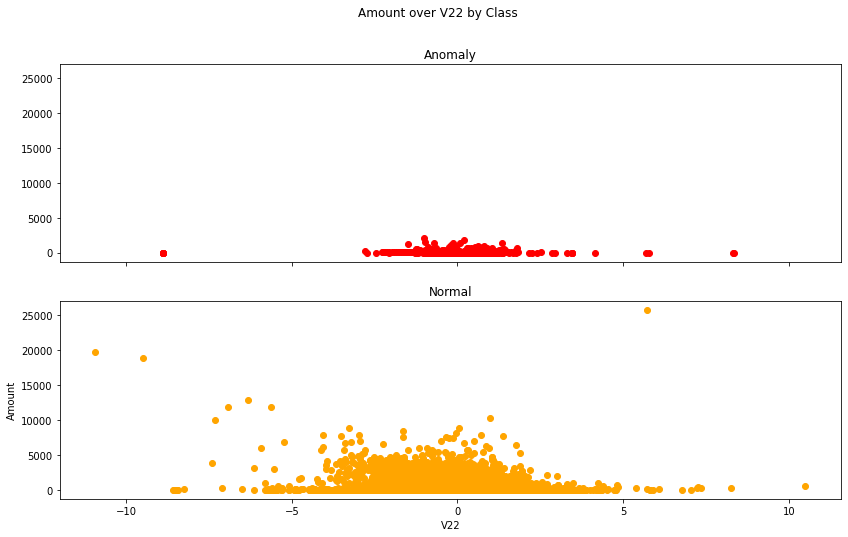

Amount vs V23


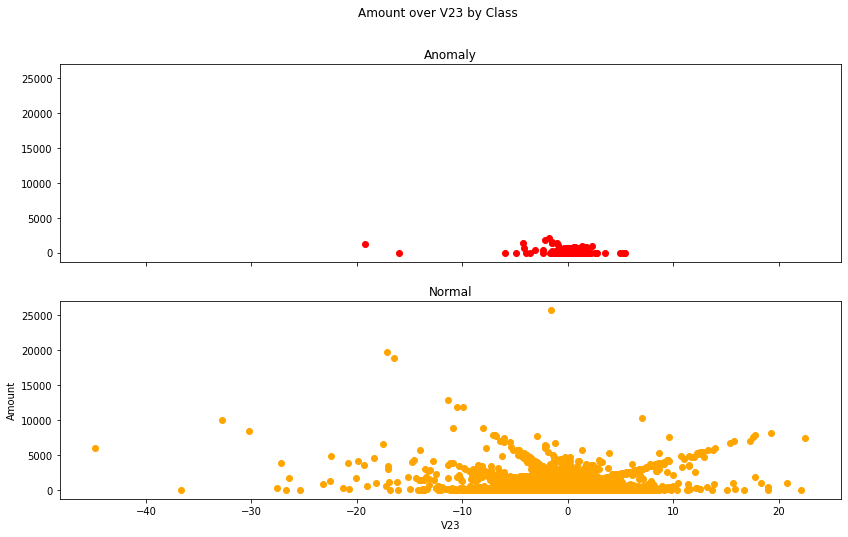

Amount vs V24


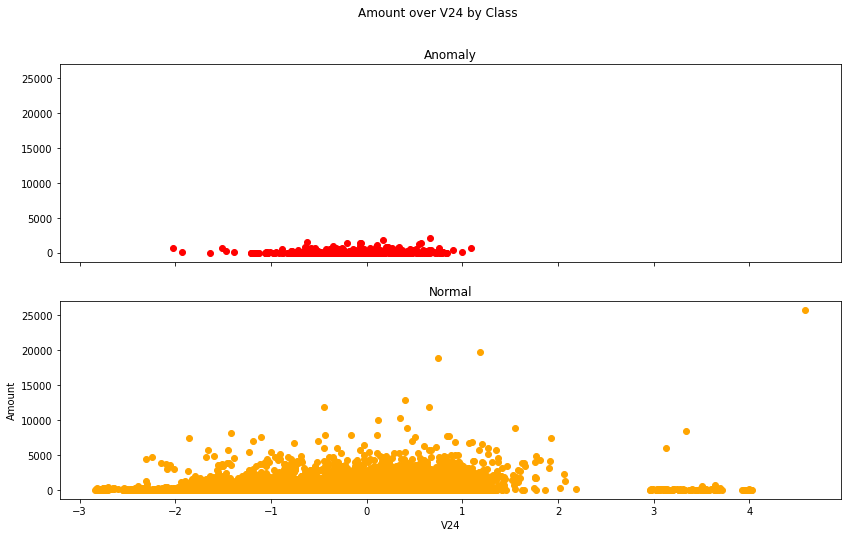

Amount vs V25


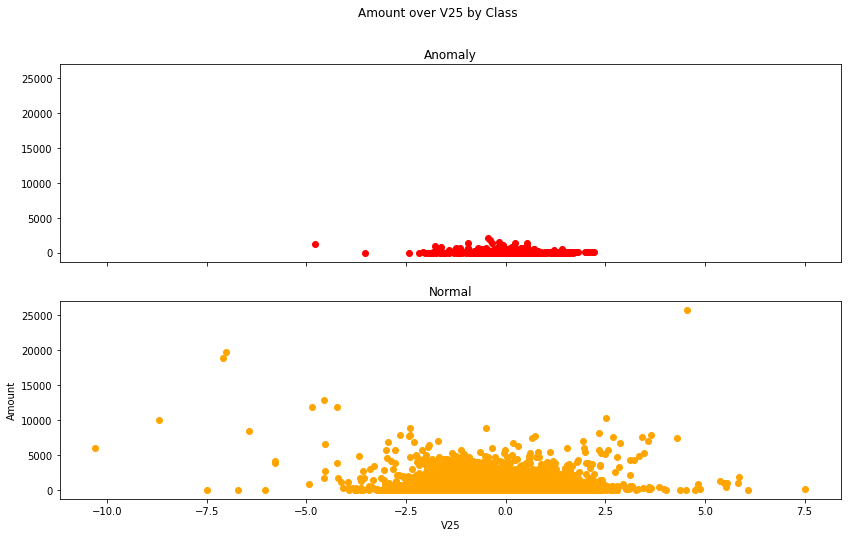

Amount vs V26


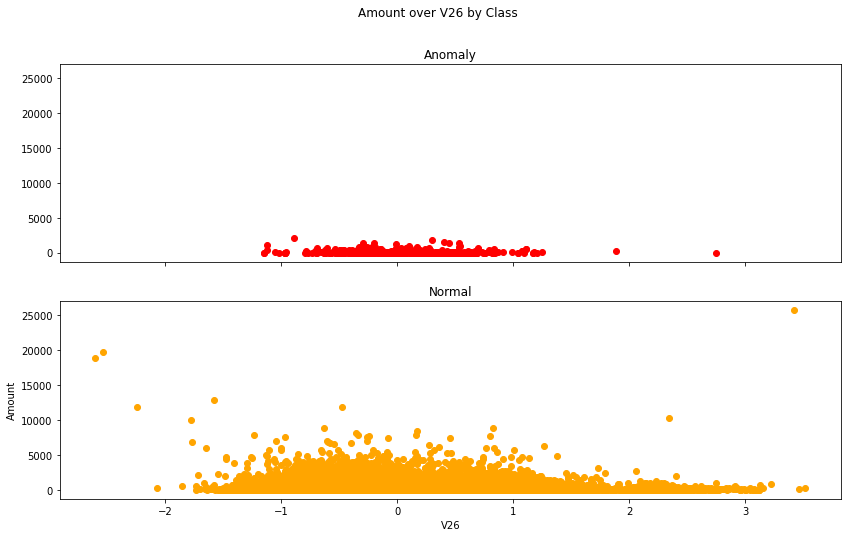

Amount vs V27


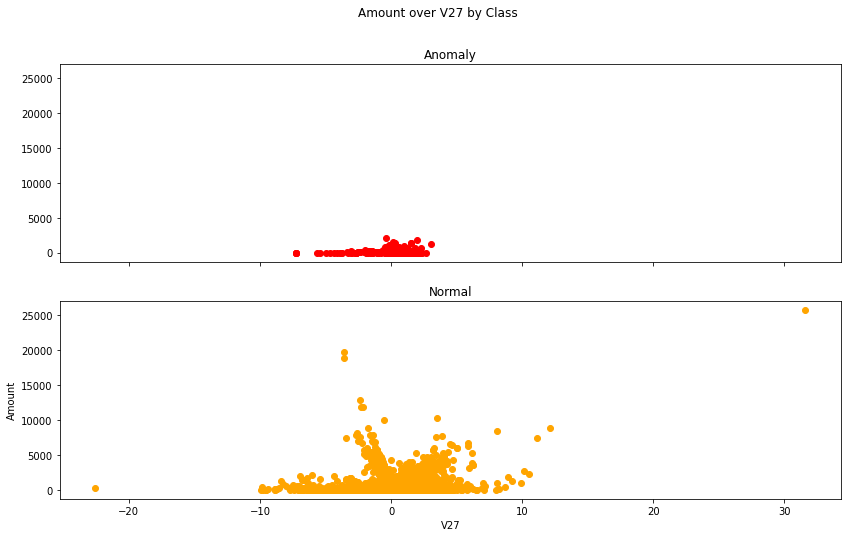

Amount vs V28


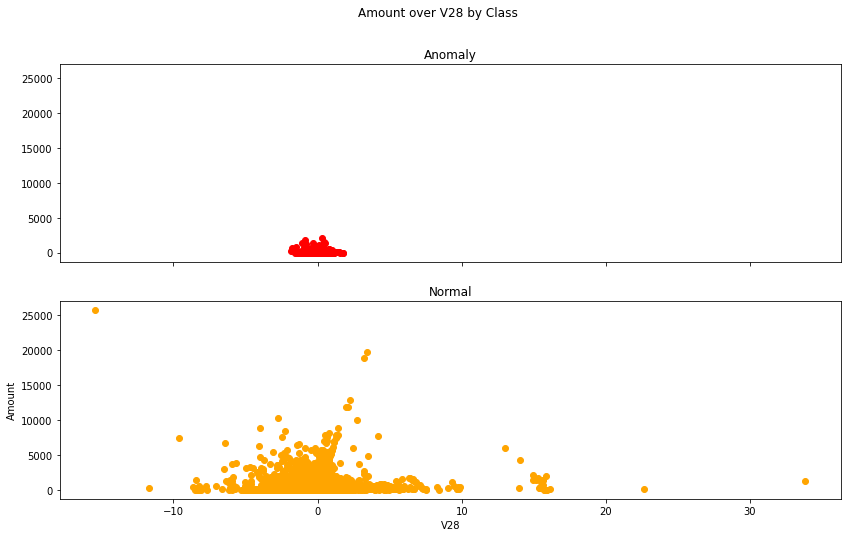

In [38]:
for f in range(1, 29):
    print(f'Amount vs V{f}')
    plot_scatter(df, f'V{f}', "Amount", sharey=True)